In [3]:
# ignore warnings
warnings.filterwarnings('ignore')
# param dict for fitting distributions
param_dict = {}

## 2. import Data 

In [4]:
# read data zone 1 and 2
zone_1 = pd.read_csv('../data/zone_1.csv', usecols=[0, 1, 2, 3])
zone_2 = pd.read_csv('../data/zone_2.csv', usecols=[0, 1, 2, 3])

## 3. explorative data analysis

In [5]:
# make a copy of the original df with specific rows keeps only the relevant ones
zone_1_cleaned = zone_1[['Datum', 'Uhrzeit', 'Masse [kg]', 'Geschwindigkeit [m/s]']].copy()
zone_2_cleaned = zone_2[['Date', 'Uhrzeit', 'm [kg]', 'v [m/s]']].copy()
# apply a consistent naming 
zone_1_cleaned.columns = ['Date', 'Time', 'Mass_kg', 'Speed_m/s']
zone_2_cleaned.columns = ['Date', 'Time', 'Mass_kg', 'Speed_m/s']

In [6]:
# sum of is na zone 1
zone_1_cleaned.isna().sum()

Date         11
Time         11
Mass_kg      11
Speed_m/s    11
dtype: int64

In [7]:
# sum of is na zone 2
zone_2_cleaned.isna().sum()

Date         3
Time         3
Mass_kg      3
Speed_m/s    3
dtype: int64

In [8]:
zone_2_cleaned[0:10]

,Date,Time,Mass_kg,Speed_m/s
0,2019-01-01,09:00,38.0,45.4
1,2019-01-03,06:00,187.0,41.6
2,2019-01-04,10:00,36.0,44.6
3,2019-01-07,14:00,6.0,41.2
4,2019-01-11,06:00,65.0,39.6
5,2019-01-11,16:00,58.0,33.2
6,2019-01-14,11:00,365.0,40.2
7,2019-01-16,02:00,22.0,46.5
8,2019-01-18,06:00,146.0,36.2
9,2019-01-19,17:00,29.0,38.3


In [9]:
# drop all duplicates and missing values of zone 1 and 2
# zone 1 
zone_1_cleaned.drop_duplicates(inplace=True)
zone_1_cleaned.dropna(inplace=True)
# zone 2
zone_2_cleaned.drop_duplicates(inplace=True)
zone_2_cleaned.dropna(inplace=True)

In [10]:
zone_1_cleaned.describe()

,Mass_kg,Speed_m/s
count,68.000000,68.000000
mean,628.632353,8.788235
std,695.884703,1.989189
min,12.000000,3.600000
25%,214.750000,7.300000
50%,402.500000,8.800000
75%,773.000000,10.125000
max,3104.000000,14.100000


In [11]:
zone_2_cleaned.describe()

,Mass_kg,Speed_m/s
count,32.000000,32.000000
mean,99.250000,37.790625
std,104.072555,5.395778
min,0.000000,24.900000
25%,36.750000,33.200000
50%,58.000000,38.750000
75%,140.000000,41.725000
max,406.000000,46.500000


In [12]:
# calculate the ratio of both zones for simulations 
ratio = zone_1_cleaned.count() / zone_2_cleaned.count()
ratio

Date         2.125
Time         2.125
Mass_kg      2.125
Speed_m/s    2.125
dtype: float64

In [13]:
# combine Date and Time columns to one and format it to a datetime-Object
# zone 1
zone_1_cleaned['DateTime'] = pd.to_datetime(zone_1_cleaned['Date'] + ' ' + zone_1_cleaned['Time'])
# zone 2
zone_2_cleaned['DateTime'] = pd.to_datetime(zone_2_cleaned['Date'] + ' ' + zone_2_cleaned['Time'])

In [14]:
# drop the old Date and Time columns
# zone 1
zone_1_cleaned.drop(['Date', 'Time'], axis=1, inplace=True)
# zone 2
zone_2_cleaned.drop(['Date', 'Time'], axis=1, inplace=True)

In [15]:
# zone 1
# calculate time deltas
# Calculating time deltas in hours
# position 0 is NAN because there is no row before the first row
zone_1_cleaned['Time_Delta_hours'] = zone_1_cleaned['DateTime'].diff().dt.total_seconds() / 3600  # convert to hours

# replace the NAN Value with 0.0
zone_1_cleaned['Time_Delta_hours'].iloc[0] = 0.0

# add energy in kj
zone_1_cleaned['kj'] = 0.5 * zone_1_cleaned['Mass_kg'] * zone_1_cleaned['Speed_m/s'] ** 2 / 1000

# zone 2
# calculate time deltas
# Calculating time deltas in hours
# position 0 is NAN because there is no row before the first row
zone_2_cleaned['Time_Delta_hours'] = zone_2_cleaned['DateTime'].diff().dt.total_seconds() / 3600  # convert to hours

# replace the NAN Value with 0.0
zone_2_cleaned['Time_Delta_hours'].iloc[0] = 0.0

# add energy in kj
zone_2_cleaned['kj'] = 0.5 * zone_2_cleaned['Mass_kg'] * zone_2_cleaned['Speed_m/s'] ** 2 / 1000

In [16]:
# zone 1
zone_1_cleaned.head(10)

,Mass_kg,Speed_m/s,DateTime,Time_Delta_hours,kj
0,194.0,8.4,2019-01-01 09:00:00,0.0,6.844320
1,224.0,8.8,2019-01-01 21:00:00,12.0,8.673280
2,3104.0,9.2,2019-01-02 14:00:00,17.0,131.361280
3,228.0,8.0,2019-01-04 15:00:00,49.0,7.296000
4,755.0,7.0,2019-01-05 23:00:00,32.0,18.497500
5,215.0,6.5,2019-01-08 16:00:00,65.0,4.541875
6,300.0,7.9,2019-01-10 10:00:00,42.0,9.361500
7,1019.0,10.4,2019-01-11 08:00:00,22.0,55.107520
8,1288.0,10.8,2019-01-13 08:00:00,48.0,75.116160
9,344.0,10.0,2019-01-15 05:00:00,45.0,17.200000


In [17]:
# zone 1
zone_2_cleaned.head(10)

,Mass_kg,Speed_m/s,DateTime,Time_Delta_hours,kj
0,38.0,45.4,2019-01-01 09:00:00,0.0,39.162040
1,187.0,41.6,2019-01-03 06:00:00,45.0,161.807360
2,36.0,44.6,2019-01-04 10:00:00,28.0,35.804880
3,6.0,41.2,2019-01-07 14:00:00,76.0,5.092320
4,65.0,39.6,2019-01-11 06:00:00,88.0,50.965200
5,58.0,33.2,2019-01-11 16:00:00,10.0,31.964960
6,365.0,40.2,2019-01-14 11:00:00,67.0,294.927300
7,22.0,46.5,2019-01-16 02:00:00,39.0,23.784750
8,146.0,36.2,2019-01-18 06:00:00,52.0,95.662120
9,29.0,38.3,2019-01-19 17:00:00,35.0,21.269905


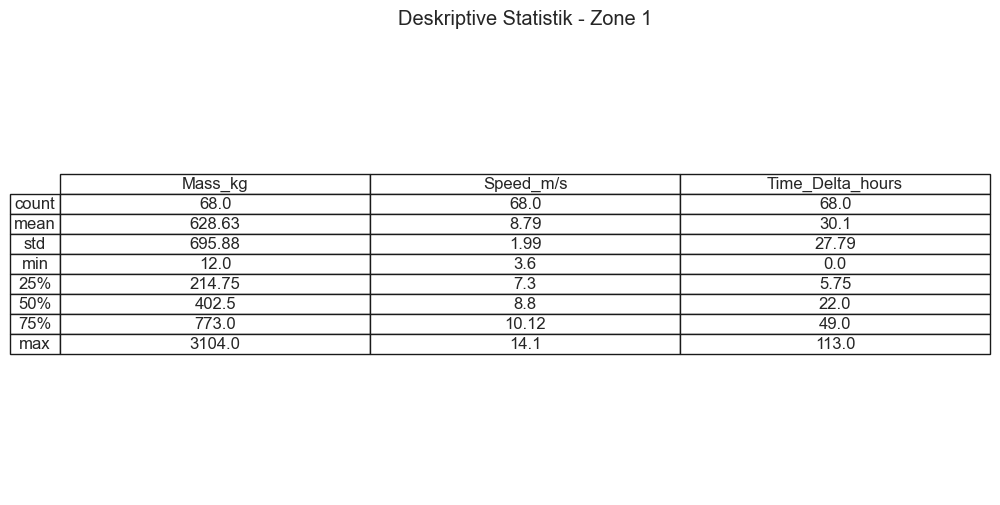

In [18]:
#Auswahl der relevanten Variablen für die Tabelle
relevant_var = ['Mass_kg', 'Speed_m/s', 'Time_Delta_hours']  # Ersetzen Sie dies durch Ihre Spaltennamen
zone_1_cleaned_stats = zone_1_cleaned[relevant_var]

# Berechnung der deskriptiven Statistiken und Runden
descriptive_stats1 = zone_1_cleaned_stats.describe().round(2)

# Setzt die Skalierung der Schriftgröße für die Grafik
sns.set(font_scale=1.2)

# Erstellt eine Figur und ein einzelnes Unterdiagramm
fig, ax = plt.subplots(figsize=(10, 6))

# Die Achsen werden unsichtbar gemacht
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Der Rahmen des Unterdiagramms wird ausgeblendet
ax.set_frame_on(False)

# Erstellt die Tabelle mit der 'table' Funktion von Matplotlib
tab = plt.table(cellText=descriptive_stats1.values, colLabels=descriptive_stats1.columns, 
                rowLabels=descriptive_stats1.index, cellLoc='center', rowLoc='center', 
                loc='center')

# Verbesserung der Ästhetik der Tabelle
tab.auto_set_font_size(False)  # Automatische Schriftgrößeneinstellung wird deaktiviert
tab.set_fontsize(12)           # Schriftgröße für die Tabelle setzen
tab.scale(1.2, 1.2)            # Skalierung der Tabelle anpassen

# Titel für die Grafik setzen
plt.title('Deskriptive Statistik - Zone 1')

# Zeigt die Grafik an
plt.show()

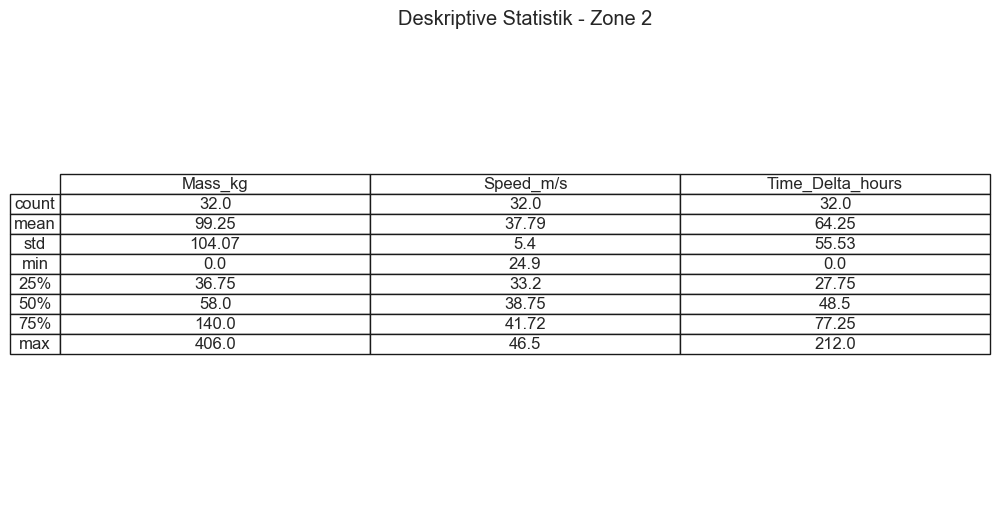

In [19]:
#Auswahl der relevanten Variablen für die Tabelle
relevant_var = ['Mass_kg', 'Speed_m/s', 'Time_Delta_hours']  # Ersetzen Sie dies durch Ihre Spaltennamen
zone_2_cleaned_stats = zone_2_cleaned[relevant_var]

# Berechnung der deskriptiven Statistiken und Runden
descriptive_stats2 = zone_2_cleaned_stats.describe().round(2)

# Setzt die Skalierung der Schriftgröße für die Grafik
sns.set(font_scale=1.2)

# Erstellt eine Figur und ein einzelnes Unterdiagramm
fig, ax = plt.subplots(figsize=(10, 6))

# Die Achsen werden unsichtbar gemacht
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Der Rahmen des Unterdiagramms wird ausgeblendet
ax.set_frame_on(False)

# Erstellt die Tabelle mit der 'table' Funktion von Matplotlib
tab = plt.table(cellText=descriptive_stats2.values, colLabels=descriptive_stats2.columns, 
                rowLabels=descriptive_stats2.index, cellLoc='center', rowLoc='center', 
                loc='center')

# Verbesserung der Ästhetik der Tabelle
tab.auto_set_font_size(False)  # Automatische Schriftgrößeneinstellung wird deaktiviert
tab.set_fontsize(12)           # Schriftgröße für die Tabelle setzen
tab.scale(1.2, 1.2)            # Skalierung der Tabelle anpassen

# Titel für die Grafik setzen
plt.title('Deskriptive Statistik - Zone 2')

# Zeigt die Grafik an
plt.show()

## 3.1 zones comparing

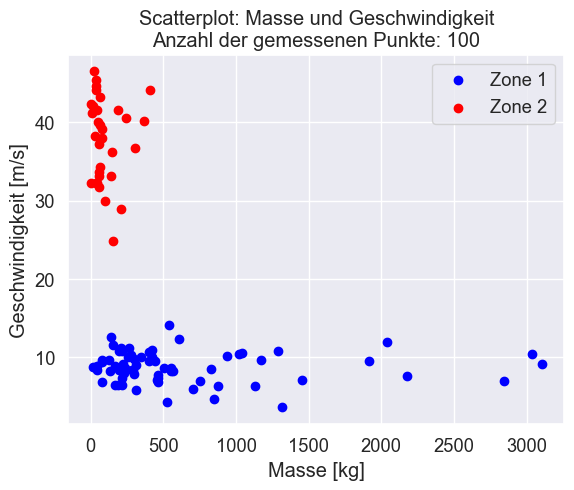

In [20]:
# zone 1 & 2 compare Mass and Speed
fig, ax = plt.subplots()
ax.scatter(zone_1_cleaned['Mass_kg'], zone_1_cleaned['Speed_m/s'], c='blue', label='Zone 1')
ax.scatter(zone_2_cleaned['Mass_kg'], zone_2_cleaned['Speed_m/s'], c='red', label='Zone 2')
ax.legend()
ax.axes.set_xlabel('Masse [kg]')
ax.axes.set_ylabel('Geschwindigkeit [m/s]')
n = zone_1_cleaned.shape[0] + zone_2_cleaned.shape[0]
plt.title(f'Scatterplot: Masse und Geschwindigkeit\nAnzahl der gemessenen Punkte: {n}')
plt.show()

## 3.2 zone 1 

### 3.2.1 zone 1 speed

Text(0.5, 0, 'Geschwindigkeit [m/s]')

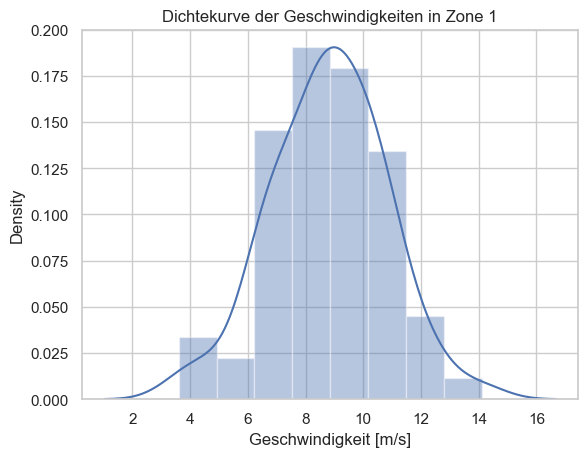

In [21]:
# Setzen Sie den Hintergrund auf weiß
sns.set(style="whitegrid")
# density plot of zone 1 speeds
sns.distplot(zone_1_cleaned['Speed_m/s'])
# add title 
plt.title('Dichtekurve der Geschwindigkeiten in Zone 1')
#X-Achse beschriften
plt.xlabel('Geschwindigkeit [m/s]')

Text(0.5, 1.0, 'Boxplot of zone 1 speed')

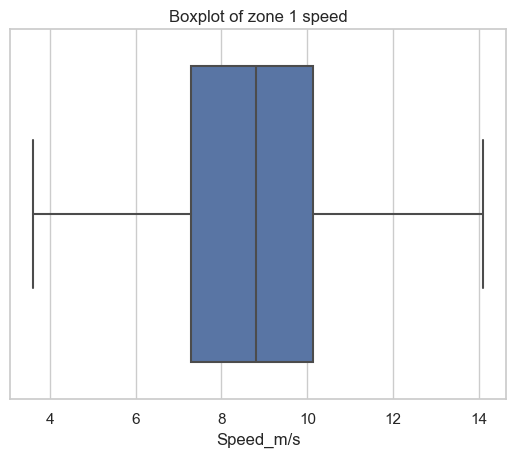

In [22]:
# sns boxplot for zone 1
sns.boxplot(data=zone_1_cleaned, x='Speed_m/s')
# title of the plot
plt.title('Boxplot of zone 1 speed')

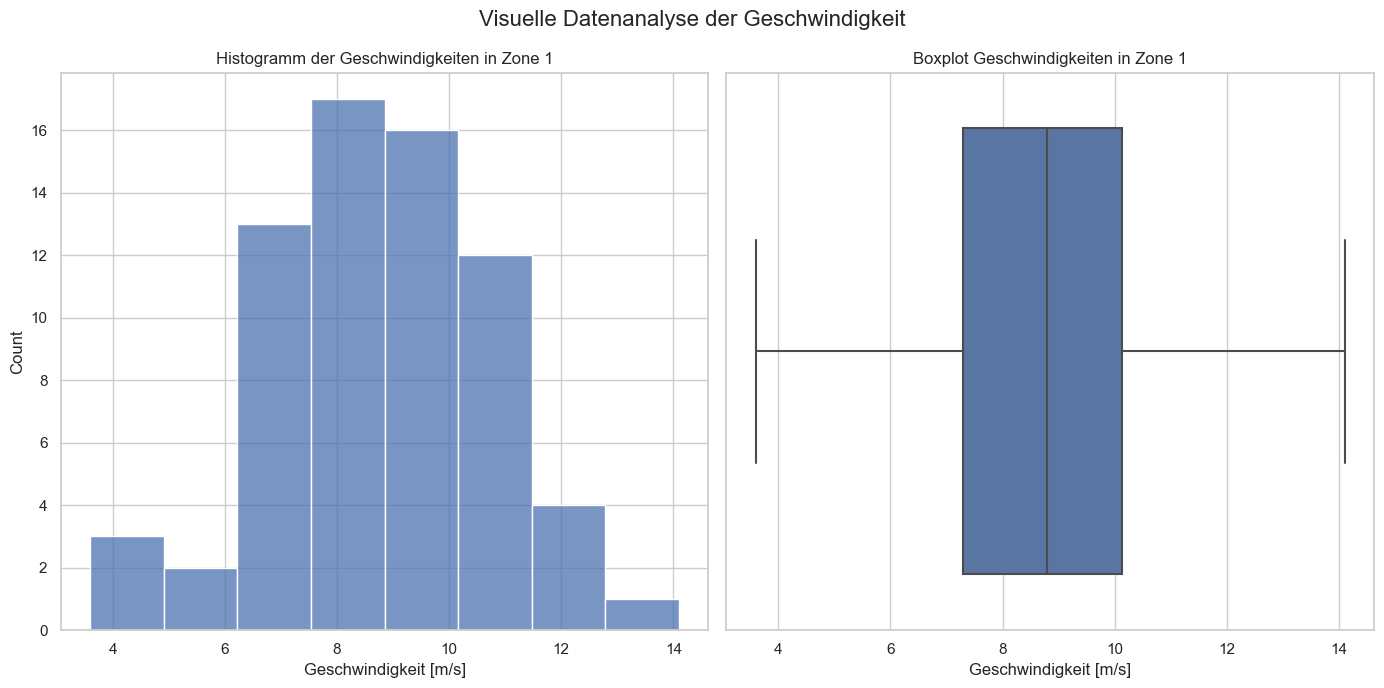

In [23]:
# Setzen Sie den Hintergrund auf weiß mit Gitterlinien
sns.set(style="whitegrid")

# Erstellen Sie eine Figur mit zwei Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Histogramm der Geschwindigkeiten in Zone 1
sns.histplot(zone_1_cleaned['Speed_m/s'], kde=False, ax=ax1)
ax1.set_title('Histogramm der Geschwindigkeiten in Zone 1')
ax1.set_xlabel('Geschwindigkeit [m/s]')

# Boxplot der Geschwindigkeiten in Zone 1
sns.boxplot(data=zone_1_cleaned, x='Speed_m/s', ax=ax2)
ax2.set_title('Boxplot Geschwindigkeiten in Zone 1')
ax2.set_xlabel('Geschwindigkeit [m/s]')

# Haupttitel hinzufügen
plt.suptitle("Visuelle Datenanalyse der Geschwindigkeit", fontsize=16)


# Layout anpassen, um Überlappungen zu verhindern
plt.tight_layout()

# Zeigen Sie die kombinierten Plots an
plt.show()

2024-01-18 12:02:18.370 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.007418)
2024-01-18 12:02:18.374 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1.840118)
2024-01-18 12:02:18.377 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=1.107997)
2024-01-18 12:02:18.380 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=1.007418)
2024-01-18 12:02:18.380 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=1.656107)
2024-01-18 12:02:18.461 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=1.017533)
2024-01-18 12:02:18.467 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=1.486085)
2024-01-18 12:02:18.477 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted ga

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.007418,559.582300,564.021316,inf,0.059355,0.958730
lognorm,1.007418,561.582245,568.240768,inf,0.059355,0.958727
gamma,1.010142,560.352868,567.011391,inf,0.063807,0.928074
chi2,1.017533,558.084152,564.742675,inf,0.075881,0.800376
exponpow,1.047920,542.377735,549.036258,inf,0.073655,0.827877


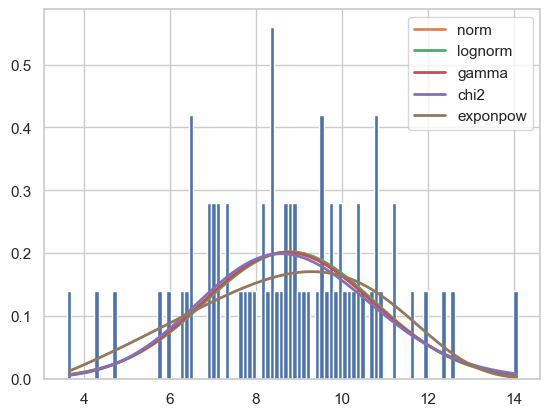

In [24]:
# fitter to get an idea how distributions look like
# original fit
#f = Fitter(zone_1_cleaned['Speed_m/s'])
f = Fitter(zone_1_cleaned['Speed_m/s'], distributions=get_common_distributions())
f.fit()
f.summary()

different QQ-Plot for different distributions

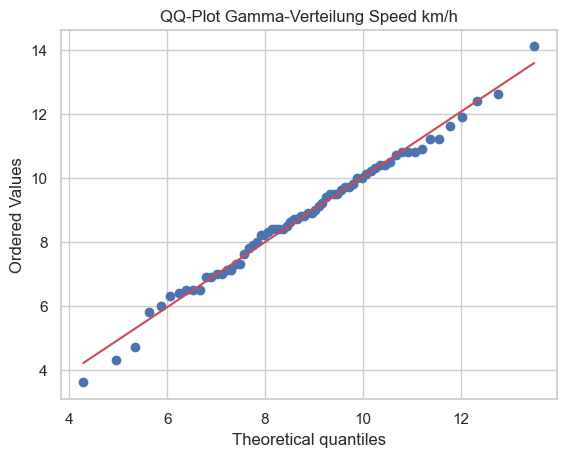

In [25]:
# Fit gamma distribution to speed
shape, loc, scale = gamma.fit(zone_1_cleaned['Speed_m/s'])
# Creating Q-Q-Plot
probplot(np.array(zone_1_cleaned['Speed_m/s']), dist=gamma, sparams=(shape, loc, scale), plot=plt)
# Adding title to plot
plt.title('QQ-Plot Gamma-Verteilung Speed km/h')
# Showing plot
plt.show()

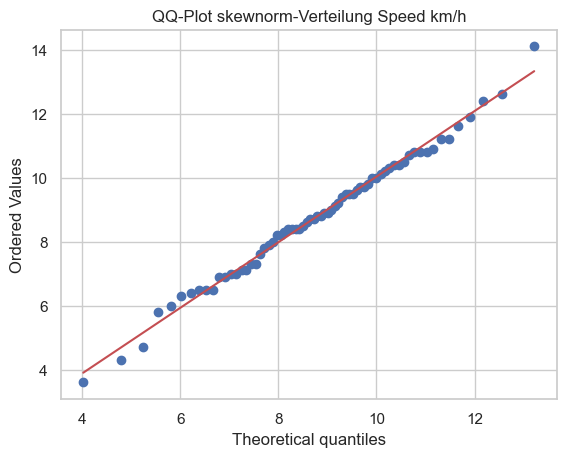

In [26]:
# Fit skewnorm distribution to data
shape, loc, scale = skewnorm.fit(zone_1_cleaned['Speed_m/s'])
# Creating Q-Q-Plot
probplot(np.array(zone_1_cleaned['Speed_m/s']), dist=skewnorm, sparams=(shape, loc, scale), plot=plt)
# Adding title to plot
plt.title("QQ-Plot skewnorm-Verteilung Speed km/h")
# Showing plot
plt.show()

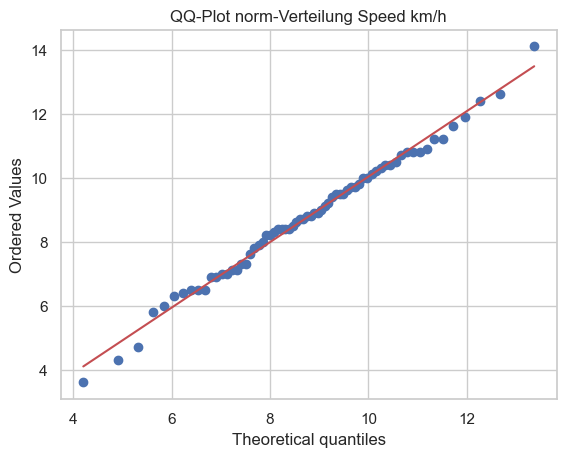

In [27]:
# Fit norm distribution to data
dist_params = norm.fit(zone_1_cleaned['Speed_m/s'])
# Creating Q-Q-Plot
probplot(np.array(zone_1_cleaned['Speed_m/s']), dist=norm, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot norm-Verteilung Speed km/h")
# Showing plot
plt.show()

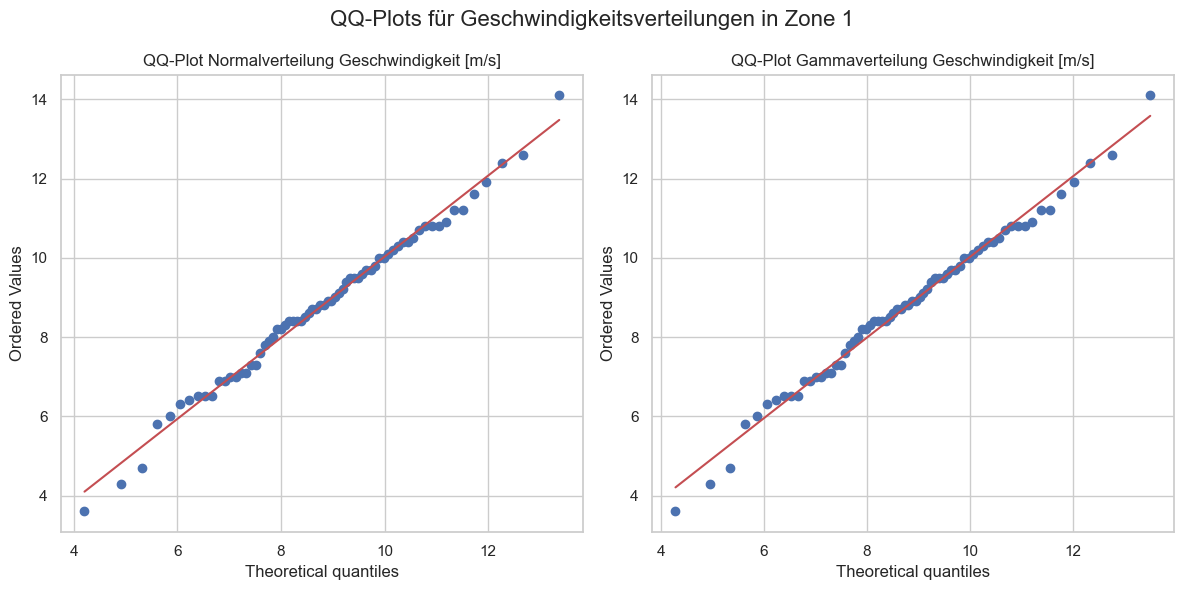

In [28]:
#Zeige die QQ-Plots von den Verteilungen der Geschwindigkeit

# Vorbereitung der Grafik mit zwei Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Hintergrund der Grafik
fig.patch.set_facecolor('white')

# QQ-Plot für die Normalverteilung
dist_params = norm.fit(zone_1_cleaned['Speed_m/s'])
probplot(np.array(zone_1_cleaned['Speed_m/s']), dist=norm, sparams=dist_params, plot=ax1)
ax1.set_title("QQ-Plot Normalverteilung Geschwindigkeit [m/s]")

# QQ-Plot für die Gammaverteilung
shape, loc, scale = gamma.fit(zone_1_cleaned['Speed_m/s'])
probplot(np.array(zone_1_cleaned['Speed_m/s']), dist=gamma, sparams=(shape, loc, scale), plot=ax2)
ax2.set_title('QQ-Plot Gammaverteilung Geschwindigkeit [m/s]')

# Haupttitel hinzufügen
plt.suptitle("QQ-Plots für Geschwindigkeitsverteilungen in Zone 1", fontsize=16)


# Layout anpassen, um Überlappungen zu vermeiden
plt.tight_layout()

# Zeige den kombinierten Plot
plt.show()



In [29]:
dist_params = norm.fit(zone_1_cleaned['Speed_m/s'])

param_dict['speed_zone_1'] = ('norm', dist_params)
param_dict

{'speed_zone_1': ('norm', (8.788235294117646, 1.9745088303442118))}

### 3.2.2 zone 1 mass

Text(0.5, 0, 'Masse [kg]')

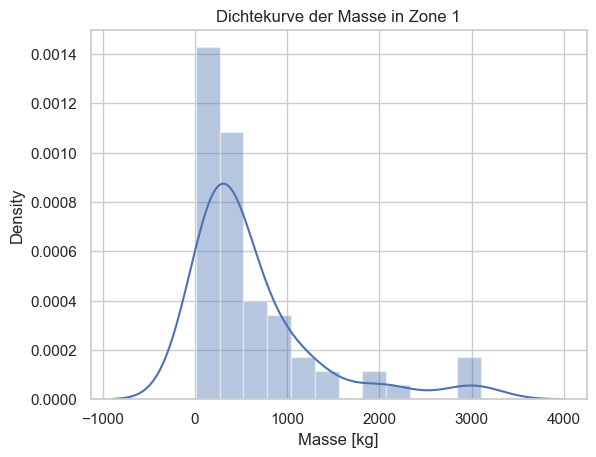

In [30]:
# Setzen Sie den Hintergrund
sns.set(style="whitegrid")
# density plot of zone 1 massen
sns.distplot(zone_1_cleaned['Mass_kg'])
# add title 
plt.title('Dichtekurve der Masse in Zone 1')
#X-Achse beschriften
plt.xlabel('Masse [kg]')


Text(0.5, 1.0, 'Boxplot of zone 1 Mass_kg')

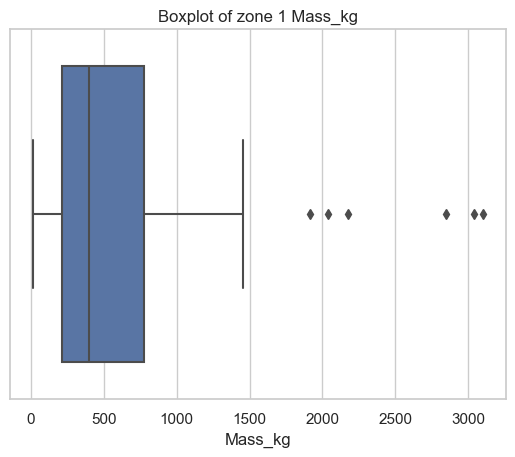

In [31]:
# sns boxplot for zone 1
sns.boxplot(data=zone_1_cleaned, x='Mass_kg')
# title of the plot
plt.title('Boxplot of zone 1 Mass_kg')

2024-01-18 12:02:19.648 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.5e-05)
2024-01-18 12:02:19.668 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=2.6e-05)
2024-01-18 12:02:19.692 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=4.6e-05)
2024-01-18 12:02:19.696 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=3.6e-05)
2024-01-18 12:02:19.706 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=1.8e-05)
2024-01-18 12:02:19.719 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1.9e-05)
2024-01-18 12:02:19.721 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=2.8e-05)
2024-01-18 12:02:19.726 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000015,1810.753526,1817.412049,inf,0.065387,0.914829
cauchy,0.000018,1940.238453,1944.677468,inf,0.180140,0.021090
expon,0.000019,1790.287904,1794.726919,inf,0.112432,0.331307
gamma,0.000021,1765.999570,1772.658093,inf,0.117606,0.281179
exponpow,0.000025,1710.846111,1717.504634,inf,0.205474,0.005390


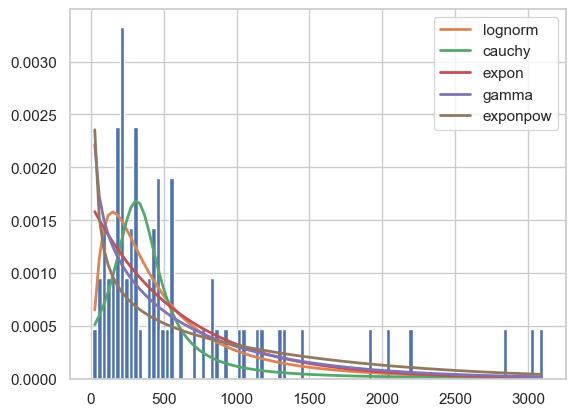

In [32]:
# fitter für zone 1 masse
# f = Fitter(zone_1_cleaned['Mass_kg'])
f = Fitter(zone_1_cleaned['Mass_kg'], distributions=get_common_distributions())
f.fit()
f.summary()

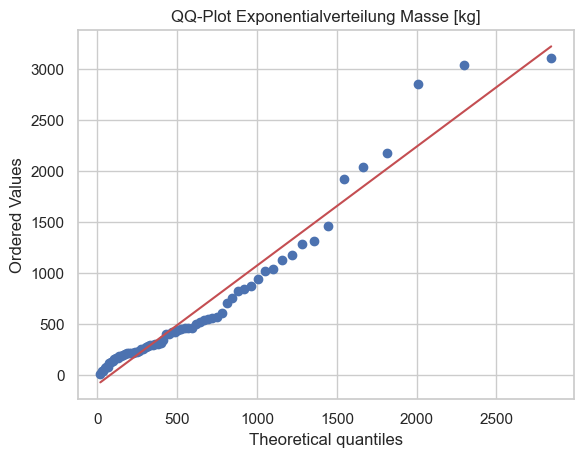

In [33]:
# Fit gamma distribution to data
dist_params = expon.fit(zone_1_cleaned['Mass_kg'])
# Creating Q-Q-Plot
probplot(np.array(zone_1_cleaned['Mass_kg']), dist=expon, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot Exponentialverteilung Masse [kg]")
# Showing plot
plt.show()


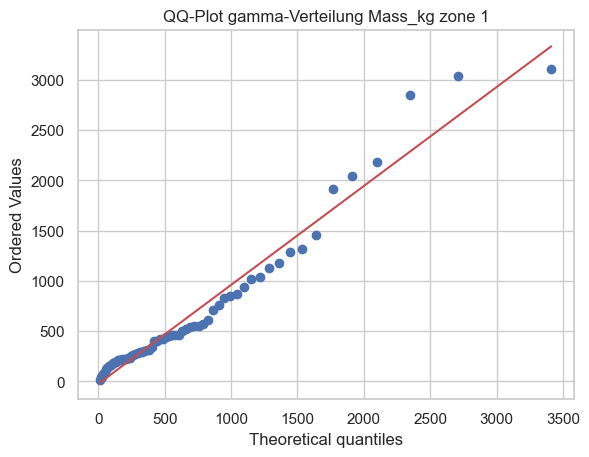

In [34]:
# Fit gamma distribution to data
dist_params = gamma.fit(zone_1_cleaned['Mass_kg'])
# Creating Q-Q-Plot
probplot(np.array(zone_1_cleaned['Mass_kg']), dist=gamma, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot gamma-Verteilung Mass_kg zone 1")
# Showing plot
plt.show()

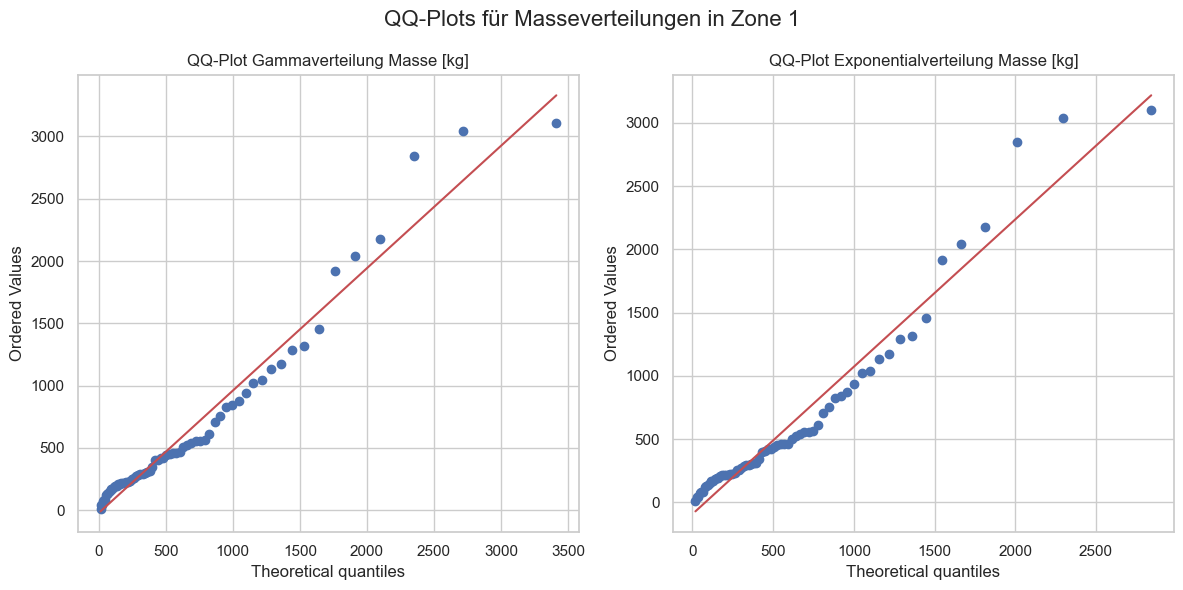

In [35]:
#Zeige die QQ-Plots von den Verteilungen der Masse

# Vorbereitung der Grafik mit zwei Subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Hintergrund der Grafik
fig.patch.set_facecolor('white')

# QQ-Plot für die Gammaverteilung
dist_params = gamma.fit(zone_1_cleaned['Mass_kg'])
probplot(np.array(zone_1_cleaned['Mass_kg']), dist=gamma, sparams=dist_params, plot=ax1)
ax1.set_title("QQ-Plot Gammaverteilung Masse [kg]")

# QQ-Plot für die Exponenzialverteilung
dist_params = expon.fit(zone_1_cleaned['Mass_kg'])
probplot(np.array(zone_1_cleaned['Mass_kg']), dist=expon, sparams=dist_params, plot=ax2)
ax2.set_title('QQ-Plot Exponentialverteilung Masse [kg]')

# Haupttitel hinzufügen
plt.suptitle("QQ-Plots für Masseverteilungen in Zone 1", fontsize=16)


# Layout anpassen, um Überlappungen zu vermeiden
plt.tight_layout()

# Zeige den kombinierten Plot
plt.show()

In [36]:
dist_params = gamma.fit(zone_1_cleaned['Mass_kg'])
param_dict['masse_zone_1'] = ('gamma', dist_params)
param_dict

{'speed_zone_1': ('norm', (8.788235294117646, 1.9745088303442118)),
 'masse_zone_1': ('gamma',
  (0.8079614675149851, 11.999999999999998, 822.0119854583972))}

### 3.2.3 zone 1 time delta


Text(0.5, 1.0, 'Density plot of zone 1 time deltas')

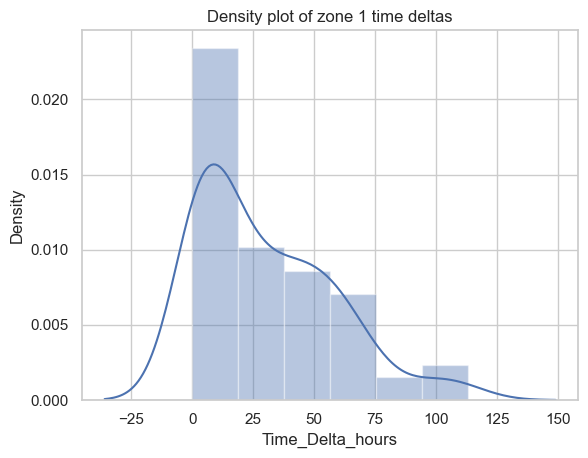

In [37]:
# density plot of zone 1 massen
sns.distplot(zone_1_cleaned['Time_Delta_hours'])
# add title 
plt.title('Density plot of zone 1 time deltas')

Text(0.5, 1.0, 'Boxplot of zone 1 Time_Delta_hours')

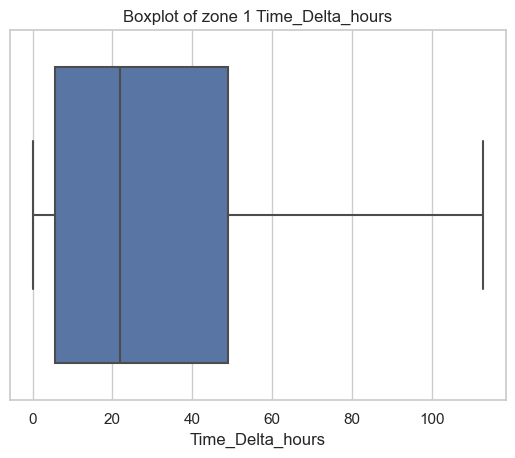

In [38]:
# sns boxplot for zone 1
sns.boxplot(data=zone_1_cleaned, x='Time_Delta_hours')
# title of the plot
plt.title('Boxplot of zone 1 Time_Delta_hours')

2024-01-18 12:02:20.657 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.025338)
2024-01-18 12:02:20.664 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.017579)
2024-01-18 12:02:20.677 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.01859)
2024-01-18 12:02:20.719 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.011535)
2024-01-18 12:02:20.733 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.016292)
2024-01-18 12:02:20.738 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.096928)
2024-01-18 12:02:20.741 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.017017)
2024-01-18 12:02:20.763 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted c

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.009305,1083.141638,1089.800161,inf,0.136433,0.144822
expon,0.011535,1060.303179,1064.742194,inf,0.116051,0.295644
exponpow,0.013617,991.751233,998.409756,inf,0.204460,0.005713
rayleigh,0.016292,1067.605966,1072.044981,inf,0.168988,0.036290
norm,0.017017,1082.647998,1087.087014,inf,0.137568,0.138696


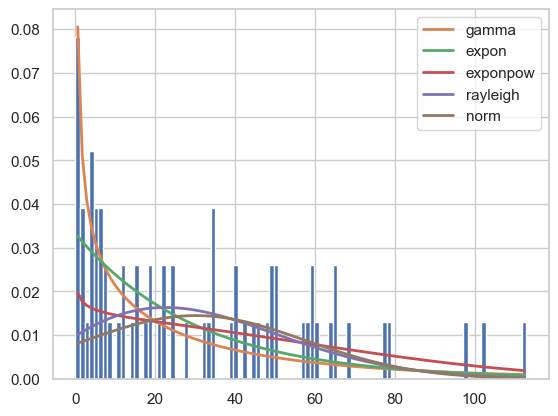

In [39]:
# fitter für zone 1 Time deltas
#f = Fitter(zone_1_cleaned['Time_Delta_hours'])
f = Fitter(zone_1_cleaned['Time_Delta_hours'], distributions=get_common_distributions())
f.fit()
f.summary()

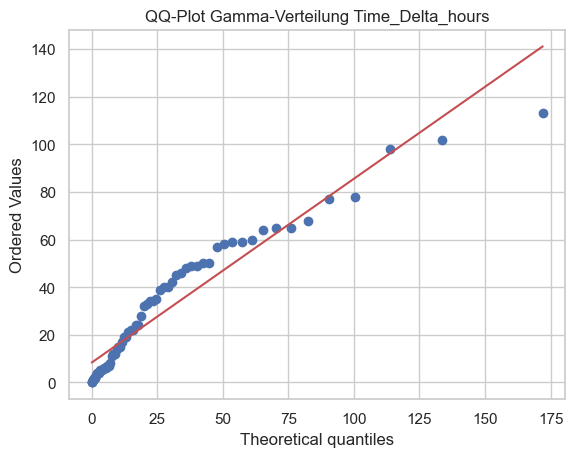

In [40]:
# Fit gamma distribution to data
shape, loc, scale = gamma.fit(zone_1_cleaned['Time_Delta_hours'])
# Creating Q-Q-Plot
probplot(np.array(zone_1_cleaned['Time_Delta_hours']), dist=gamma, sparams=(shape, loc, scale), plot=plt)
# Adding title to plot
plt.title("QQ-Plot Gamma-Verteilung Time_Delta_hours")
# Showing plot
plt.show()

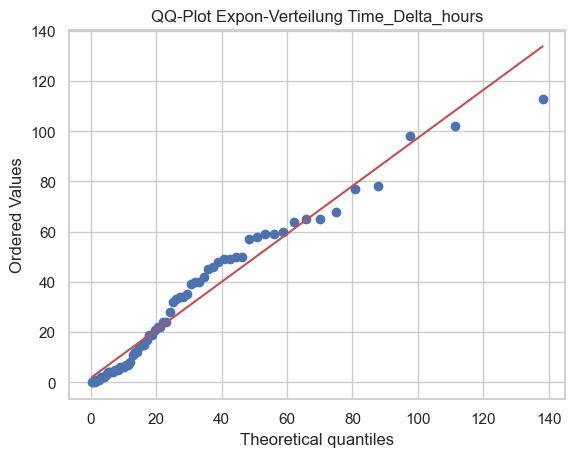

In [41]:
# Fit gamma distribution to data
dist_params = expon.fit(zone_1_cleaned['Time_Delta_hours'])
# Creating Q-Q-Plot
probplot(np.array(zone_1_cleaned['Time_Delta_hours']), dist=expon, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot Expon-Verteilung Time_Delta_hours")
# Showing plot
plt.show()

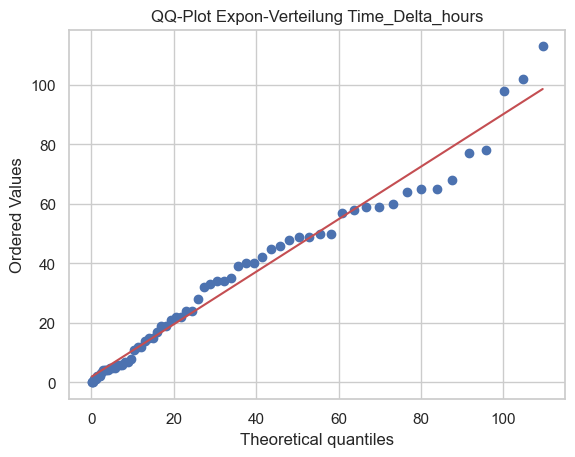

In [42]:
# Fit gamma distribution to data
dist_params = truncweibull_min.fit(zone_1_cleaned['Time_Delta_hours'])
# Creating Q-Q-Plot
probplot(np.array(zone_1_cleaned['Time_Delta_hours']), dist=truncweibull_min, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot Expon-Verteilung Time_Delta_hours")
# Showing plot
plt.show()

In [43]:
dist_params = expon.fit(zone_1_cleaned['Time_Delta_hours'])
param_dict['time_delta_zone_1'] = ('expon', dist_params)
param_dict

{'speed_zone_1': ('norm', (8.788235294117646, 1.9745088303442118)),
 'masse_zone_1': ('gamma',
  (0.8079614675149851, 11.999999999999998, 822.0119854583972)),
 'time_delta_zone_1': ('expon', (0.0, 30.102941176470587))}

### 3.3 zone 2

### 3.3.1 zone 2 speed

Text(0.5, 1.0, 'Density plot of zone 2 speeds')

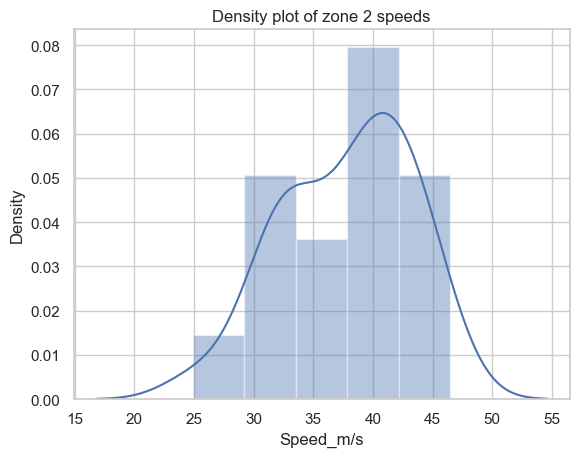

In [44]:
# density plot of zone 2 speeds
sns.distplot(zone_2_cleaned['Speed_m/s'])
# add title 
plt.title('Density plot of zone 2 speeds')

Text(0.5, 1.0, 'Boxplot of zone 2 speed')

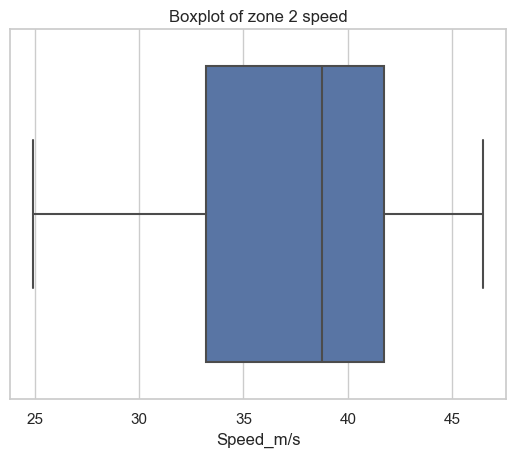

In [45]:
# sns boxplot for zone 2
sns.boxplot(data=zone_2_cleaned, x='Speed_m/s')
# title of the plot
plt.title('Boxplot of zone 2 speed')

2024-01-18 12:02:21.596 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.607154)
2024-01-18 12:02:21.598 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.607154)
2024-01-18 12:02:21.599 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.741294)
2024-01-18 12:02:21.612 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.62628)
2024-01-18 12:02:21.634 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.622911)
2024-01-18 12:02:21.642 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.721689)
2024-01-18 12:02:21.671 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi2 distribution with error=0.608647)
2024-01-18 12:02:21.676 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted un

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.607154,675.068739,678.000211,inf,0.104641,0.839121
lognorm,0.607154,677.069040,681.466248,inf,0.104643,0.839108
chi2,0.608647,677.413072,681.810279,inf,0.113398,0.763308
gamma,0.608798,677.225194,681.622402,inf,0.113424,0.763071
uniform,0.622910,618.538663,621.470135,inf,0.221065,0.074555


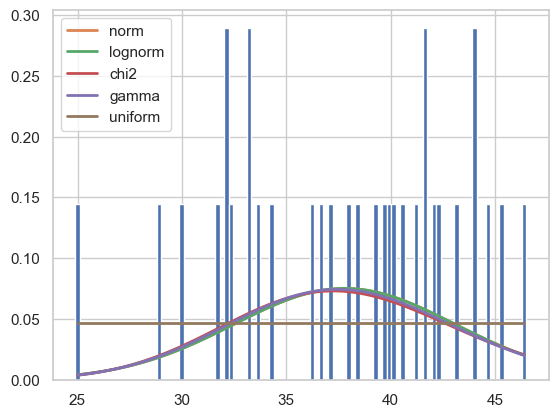

In [46]:
# fitter für zone 2 speed
#f = Fitter(zone_2_cleaned['Speed_m/s'])
f = Fitter(zone_2_cleaned['Speed_m/s'], distributions=get_common_distributions())
f.fit()
f.summary()

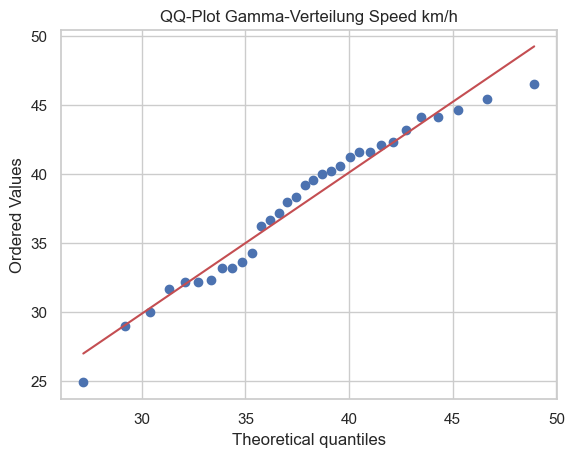

In [47]:
dist_params = gamma.fit(zone_2_cleaned['Speed_m/s'])
# Creating Q-Q-Plot
probplot(np.array(zone_2_cleaned['Speed_m/s']), dist=gamma, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title('QQ-Plot Gamma-Verteilung Speed km/h')
# Showing plot
plt.show()

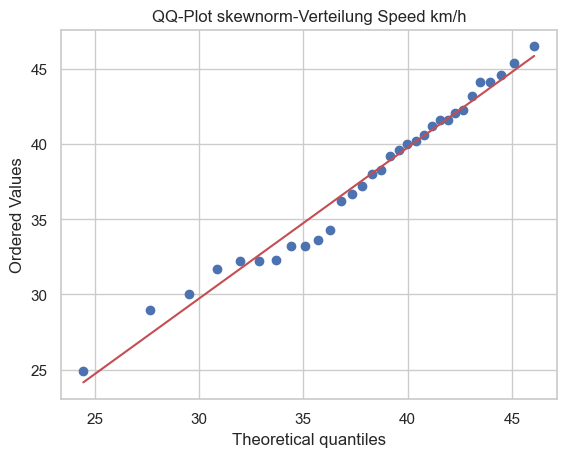

In [48]:
dist_params= skewnorm.fit(zone_2_cleaned['Speed_m/s'])
# Creating Q-Q-Plot
probplot(np.array(zone_2_cleaned['Speed_m/s']), dist=skewnorm, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot skewnorm-Verteilung Speed km/h")
# Showing plot
plt.show()

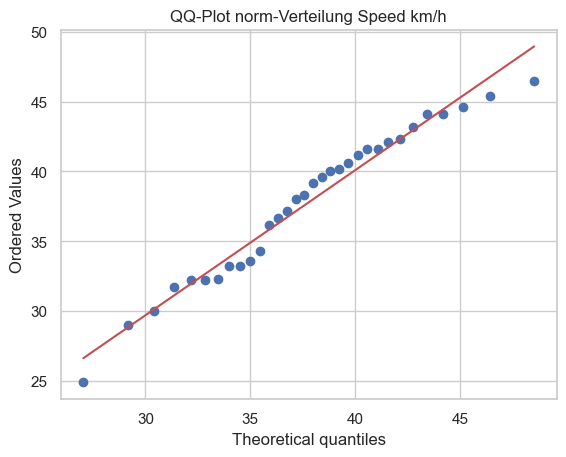

In [49]:
dist_params = norm.fit(zone_2_cleaned['Speed_m/s'])
# Creating Q-Q-Plot
probplot(np.array(zone_2_cleaned['Speed_m/s']), dist=norm, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot norm-Verteilung Speed km/h")
# Showing plot
plt.show()

In [50]:
dist_params = norm.fit(zone_2_cleaned['Speed_m/s'])
param_dict['speed_zone_2'] = ('norm', dist_params)
param_dict

{'speed_zone_1': ('norm', (8.788235294117646, 1.9745088303442118)),
 'masse_zone_1': ('gamma',
  (0.8079614675149851, 11.999999999999998, 822.0119854583972)),
 'time_delta_zone_1': ('expon', (0.0, 30.102941176470587)),
 'speed_zone_2': ('norm', (37.790625, 5.31080027956004))}

### 3.3.2 zone 2 mass

Text(0.5, 1.0, 'Density plot of zone 2 mass')

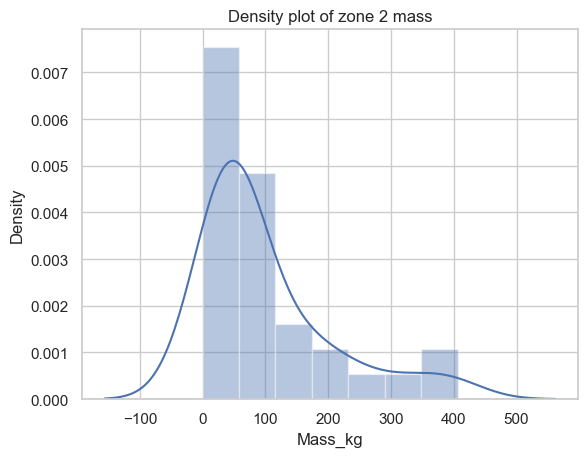

In [51]:
# density plot of zone 2 mass
sns.distplot(zone_2_cleaned['Mass_kg'])
# add title 
plt.title('Density plot of zone 2 mass')

Text(0.5, 1.0, 'Boxplot of zone 2 Mass_kg')

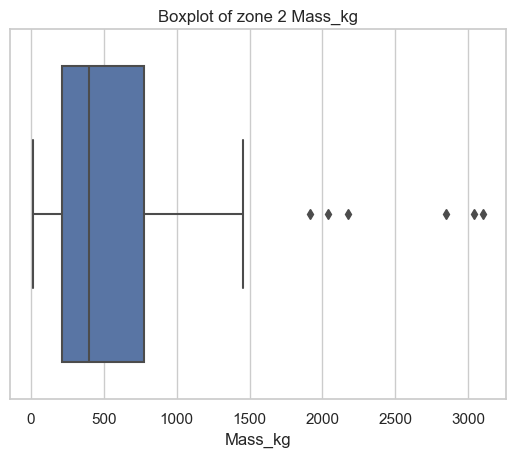

In [52]:
# sns boxplot for zone 2 mass
sns.boxplot(data=zone_1_cleaned, x='Mass_kg')
# title of the plot
plt.title('Boxplot of zone 2 Mass_kg')

2024-01-18 12:02:22.530 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.003006)
2024-01-18 12:02:22.547 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.001801)
2024-01-18 12:02:22.554 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.002526)
2024-01-18 12:02:22.566 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.002474)
2024-01-18 12:02:22.578 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.002255)
2024-01-18 12:02:22.607 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.002129)
2024-01-18 12:02:22.612 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.001599)
2024-01-18 12:02:22.653 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitte

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.001599,1499.254141,1502.185613,inf,0.184306,0.200537
expon,0.001801,1332.596394,1335.527866,inf,0.147827,0.444047
exponpow,0.001874,1322.171157,1326.568365,inf,0.150116,0.424960
gamma,0.002016,1361.275169,1365.672377,inf,0.218622,0.080077
rayleigh,0.002129,1339.323451,1342.254923,inf,0.294552,0.005902


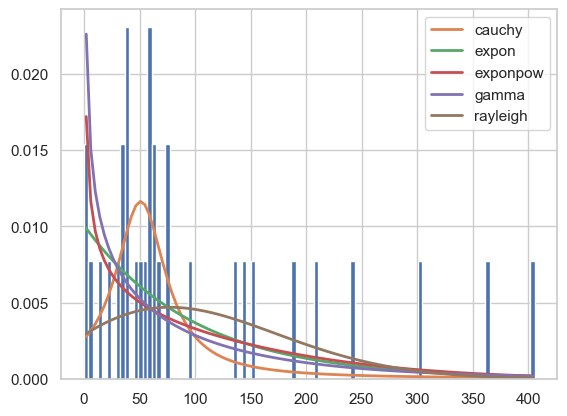

In [53]:
# fitter für zone 2 Masse
#f = Fitter(zone_2_cleaned['Mass_kg'])
f = Fitter(zone_2_cleaned['Mass_kg'], distributions=get_common_distributions())
f.fit()
f.summary()

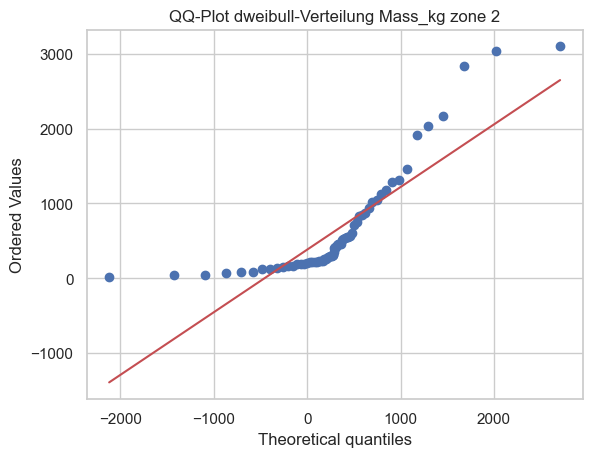

In [54]:
# Fit dweibull distribution to data
dist_params = dweibull.fit(zone_1_cleaned['Mass_kg'])
# Creating Q-Q-Plot
probplot(np.array(zone_1_cleaned['Mass_kg']), dist=dweibull, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot dweibull-Verteilung Mass_kg zone 2")
# Showing plot
plt.show()


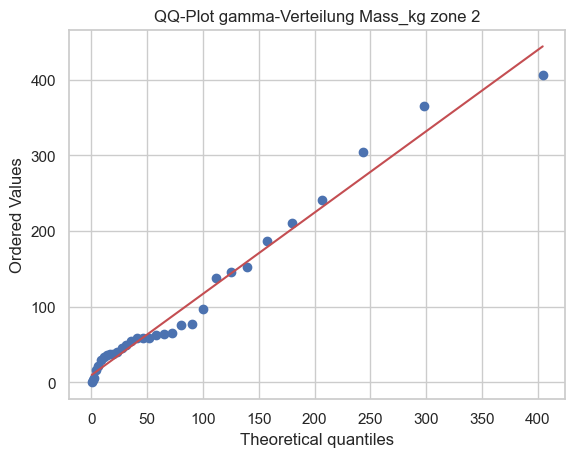

In [55]:
# Fit gamma distribution to data
dist_params = gamma.fit(zone_2_cleaned['Mass_kg'])
# Creating Q-Q-Plot
probplot(np.array(zone_2_cleaned['Mass_kg']), dist=gamma, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot gamma-Verteilung Mass_kg zone 2")
# Showing plot
plt.show()

In [56]:
dist_params = gamma.fit(zone_2_cleaned['Mass_kg'])
param_dict['masse_zone_2'] = ('gamma', dist_params)
param_dict

{'speed_zone_1': ('norm', (8.788235294117646, 1.9745088303442118)),
 'masse_zone_1': ('gamma',
  (0.8079614675149851, 11.999999999999998, 822.0119854583972)),
 'time_delta_zone_1': ('expon', (0.0, 30.102941176470587)),
 'speed_zone_2': ('norm', (37.790625, 5.31080027956004)),
 'masse_zone_2': ('gamma',
  (0.6594803921005904, -3.788074626145447e-27, 132.038825053617))}

### 3.3.3 zone 2 time delta

Text(0.5, 1.0, 'Density plot of zone 2 time deltas')

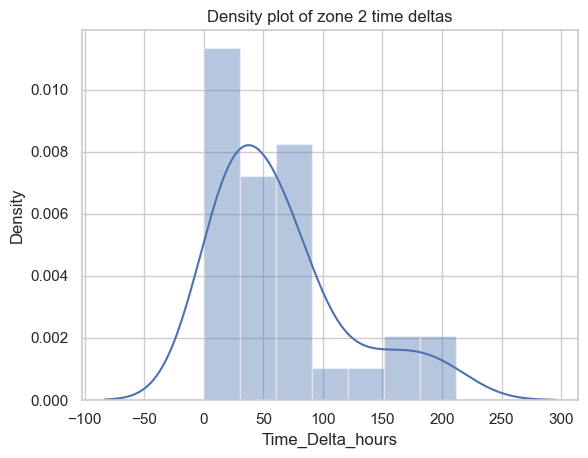

In [57]:
# density plot of zone 2 time delta
sns.distplot(zone_2_cleaned['Time_Delta_hours'])
# add title 
plt.title('Density plot of zone 2 time deltas')

Text(0.5, 1.0, 'Boxplot of zone 2 Time_Delta_hours')

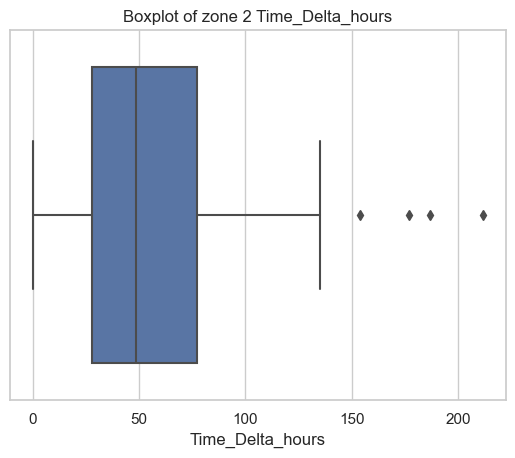

In [58]:
# sns boxplot for zone 2 Time Deltas
sns.boxplot(data=zone_2_cleaned, x='Time_Delta_hours')
# title of the plot
plt.title('Boxplot of zone 2 Time_Delta_hours')

2024-01-18 12:02:23.378 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.00624)
2024-01-18 12:02:23.406 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powerlaw distribution with error=0.008769)
2024-01-18 12:02:23.411 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.009396)
2024-01-18 12:02:23.436 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.006523)
2024-01-18 12:02:23.440 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.006846)
2024-01-18 12:02:23.446 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted uniform distribution with error=0.007336)
2024-01-18 12:02:23.447 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.006085)
2024-01-18 12:02:23.451 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted ra

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.006085,1165.627059,1170.024267,inf,0.079356,0.978111
expon,0.006240,1166.517434,1169.448906,inf,0.124357,0.659935
exponpow,0.006321,1122.241560,1126.638768,inf,0.188953,0.178767
cauchy,0.006523,1261.312292,1264.243764,inf,0.174832,0.251141
rayleigh,0.006544,1161.750837,1164.682309,inf,0.169677,0.282354


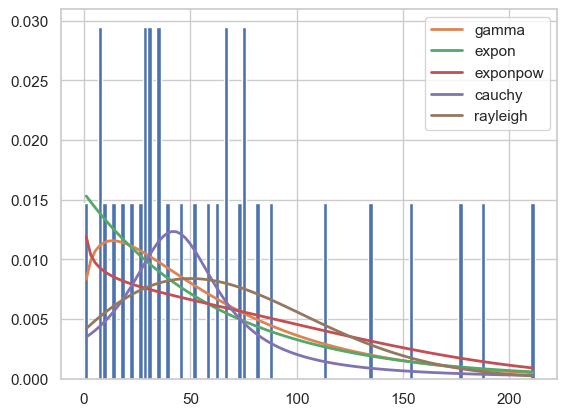

In [59]:
# fitter für zone 2 Time Deltas
#f = Fitter(zone_2_cleaned['Time_Delta_hours'])
f = Fitter(zone_2_cleaned['Time_Delta_hours'], distributions=get_common_distributions())
f.fit()
f.summary()

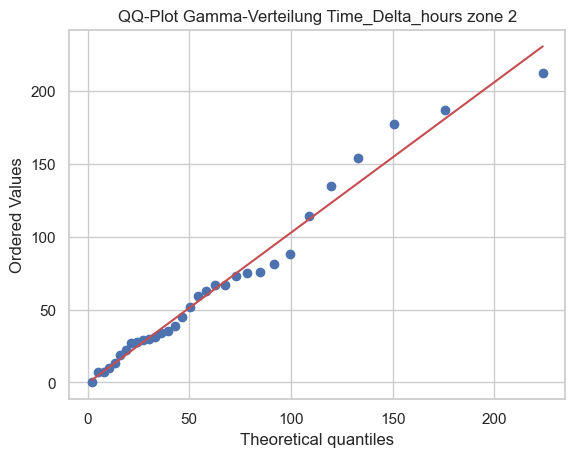

In [60]:
dist_params= gamma.fit(zone_2_cleaned['Time_Delta_hours'])
# Creating Q-Q-Plot
probplot(np.array(zone_2_cleaned['Time_Delta_hours']), dist=gamma, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot Gamma-Verteilung Time_Delta_hours zone 2")
# Showing plot
plt.show()

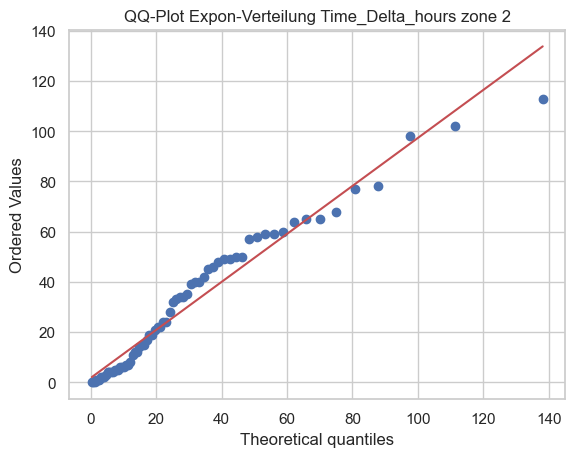

In [61]:
dist_params = expon.fit(zone_1_cleaned['Time_Delta_hours'])
# Creating Q-Q-Plot
probplot(np.array(zone_1_cleaned['Time_Delta_hours']), dist=expon, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot Expon-Verteilung Time_Delta_hours zone 2")
# Showing plot
plt.show()

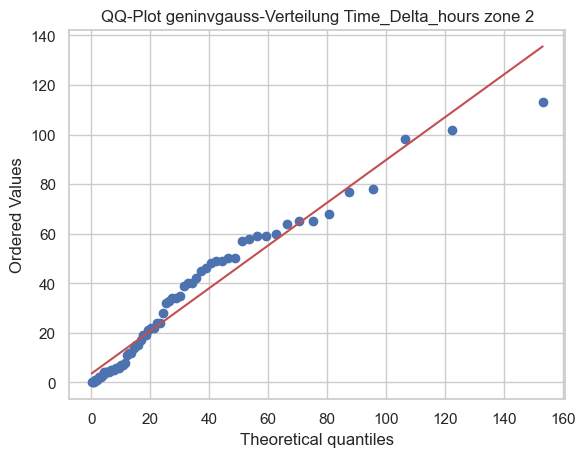

In [62]:
dist_params = geninvgauss.fit(zone_1_cleaned['Time_Delta_hours'])
# Creating Q-Q-Plot
probplot(np.array(zone_1_cleaned['Time_Delta_hours']), dist=geninvgauss, sparams=dist_params, plot=plt)
# Adding title to plot
plt.title("QQ-Plot geninvgauss-Verteilung Time_Delta_hours zone 2")
# Showing plot
plt.show()

In [63]:
dist_params = expon.fit(zone_2_cleaned['Time_Delta_hours'])
param_dict['delta_zone_2'] = ('expon', dist_params)
param_dict

{'speed_zone_1': ('norm', (8.788235294117646, 1.9745088303442118)),
 'masse_zone_1': ('gamma',
  (0.8079614675149851, 11.999999999999998, 822.0119854583972)),
 'time_delta_zone_1': ('expon', (0.0, 30.102941176470587)),
 'speed_zone_2': ('norm', (37.790625, 5.31080027956004)),
 'masse_zone_2': ('gamma',
  (0.6594803921005904, -3.788074626145447e-27, 132.038825053617)),
 'delta_zone_2': ('expon', (0.0, 64.25))}

# 4 Distribution Params

In [64]:
param_dict

{'speed_zone_1': ('norm', (8.788235294117646, 1.9745088303442118)),
 'masse_zone_1': ('gamma',
  (0.8079614675149851, 11.999999999999998, 822.0119854583972)),
 'time_delta_zone_1': ('expon', (0.0, 30.102941176470587)),
 'speed_zone_2': ('norm', (37.790625, 5.31080027956004)),
 'masse_zone_2': ('gamma',
  (0.6594803921005904, -3.788074626145447e-27, 132.038825053617)),
 'delta_zone_2': ('expon', (0.0, 64.25))}

# Simulation Analysis

In [65]:
# read csv file 
data = pd.read_csv('../simulation/.csv')
#data = pd.read_csv('/Users/kimon/Downloads/output_500_000_000.csv')
data = data.rename(columns = {'mass_kg':'Mass_kg','speed_m/s':'Speed_m/s'})

data


,Unnamed: 0,Speed_m/s,Mass_kg,datetime,zone,energy,breaches,cum_kg
0,0,11.995520,322.788578,16.0,1,23.223426,0,0.000000
1,673200,46.417199,35.668842,35.0,2,38.425265,0,322.788578
2,1,7.580317,12.010873,54.0,1,0.345080,0,358.457420
3,2,7.745356,88.451815,54.0,1,2.653136,0,370.468293
4,3,6.669649,114.687682,65.0,1,2.550896,0,458.920108
...,...,...,...,...,...,...,...,...
989995,989995,33.531830,2.436396,20334145.0,2,1.369722,0,0.000000
989996,989996,35.232454,24.851370,20334159.0,2,15.424323,0,0.000000
989997,989997,37.267031,5.020971,20334168.0,2,3.486641,0,0.000000
989998,989998,38.217582,101.373182,20334220.0,2,74.032003,0,0.000000


In [66]:
data.describe()

,Unnamed: 0,Speed_m/s,Mass_kg,datetime,zone,energy,breaches,cum_kg
count,990000.000000,990000.000000,990000.000000,9.900000e+05,990000.000000,9.900000e+05,990000.000000,990000.000000
mean,494999.500000,18.073798,486.757143,1.013610e+07,1.320000,3.886731e+01,0.000041,5.746019
std,285788.527588,13.957278,669.755648,5.852096e+06,0.466476,5.722016e+01,0.006435,304.035611
min,0.000000,0.055457,0.000002,1.600000e+01,1.000000,7.780673e-07,0.000000,0.000000
25%,247499.750000,8.121296,60.287979,5.071030e+06,1.000000,6.391669e+00,0.000000,0.000000
50%,494999.500000,10.031664,216.908736,1.014154e+07,1.000000,1.909206e+01,0.000000,0.000000
75%,742499.250000,33.677172,651.151903,1.519911e+07,2.000000,4.748653e+01,0.000000,0.000000
max,989999.000000,61.853344,13255.049435,2.033434e+07,2.000000,1.481960e+03,1.000000,51637.678561


In [67]:
data['zone'] == 2


0         False
1          True
2         False
3         False
4         False
          ...  
989995     True
989996     True
989997     True
989998     True
989999     True
Name: zone, Length: 990000, dtype: bool

In [68]:
# split data into zone 1 and zone 2
simulated_zone_1 = data[data['zone'] == 1]
# split data into zone 2
simulated_zone_2 = data[data['zone'] == 2]

#Delta Time Variable wiederherstellen
simulated_zone_1['Time_Delta_hours'] = simulated_zone_1['datetime'] - simulated_zone_1['datetime'].shift(1)
simulated_zone_1['Time_Delta_hours'] = simulated_zone_1['Time_Delta_hours'].fillna(0)

#Delta Time Variable wiederherstellen
simulated_zone_2['Time_Delta_hours'] = simulated_zone_2['datetime'] - simulated_zone_2['datetime'].shift(1)
simulated_zone_2['Time_Delta_hours'] = simulated_zone_2['Time_Delta_hours'].fillna(0)


In [69]:
simulated_zone_1


,Unnamed: 0,Speed_m/s,Mass_kg,datetime,zone,energy,breaches,cum_kg,Time_Delta_hours
0,0,11.995520,322.788578,16.0,1,23.223426,0,0.000000,0.0
2,1,7.580317,12.010873,54.0,1,0.345080,0,358.457420,38.0
3,2,7.745356,88.451815,54.0,1,2.653136,0,370.468293,0.0
4,3,6.669649,114.687682,65.0,1,2.550896,0,458.920108,11.0
5,4,10.496990,299.667666,70.0,1,16.509711,0,573.607790,5.0
...,...,...,...,...,...,...,...,...,...
988733,673195,12.399682,82.666353,20249668.0,1,6.355063,0,0.000000,13.0
988734,673196,10.521265,1344.518611,20249741.0,1,74.417099,0,0.000000,73.0
988735,673197,11.383864,65.644266,20249745.0,1,4.253498,0,0.000000,4.0
988736,673198,11.055992,347.378277,20249755.0,1,21.230884,0,0.000000,10.0


In [70]:
simulated_zone_2

,Unnamed: 0,Speed_m/s,Mass_kg,datetime,zone,energy,breaches,cum_kg,Time_Delta_hours
1,673200,46.417199,35.668842,35.0,2,38.425265,0,322.788578,0.0
10,673202,34.985610,7.194038,117.0,2,4.402726,0,1670.613950,82.0
11,673201,34.541709,0.000139,117.0,2,0.000083,0,1677.807987,0.0
13,673203,32.092303,10.326465,140.0,2,5.317695,0,1762.174880,23.0
15,673204,42.386632,32.821124,150.0,2,29.483652,0,2946.971035,10.0
...,...,...,...,...,...,...,...,...,...
989995,989995,33.531830,2.436396,20334145.0,2,1.369722,0,0.000000,20.0
989996,989996,35.232454,24.851370,20334159.0,2,15.424323,0,0.000000,14.0
989997,989997,37.267031,5.020971,20334168.0,2,3.486641,0,0.000000,9.0
989998,989998,38.217582,101.373182,20334220.0,2,74.032003,0,0.000000,52.0


## Compare distributions Zone 1

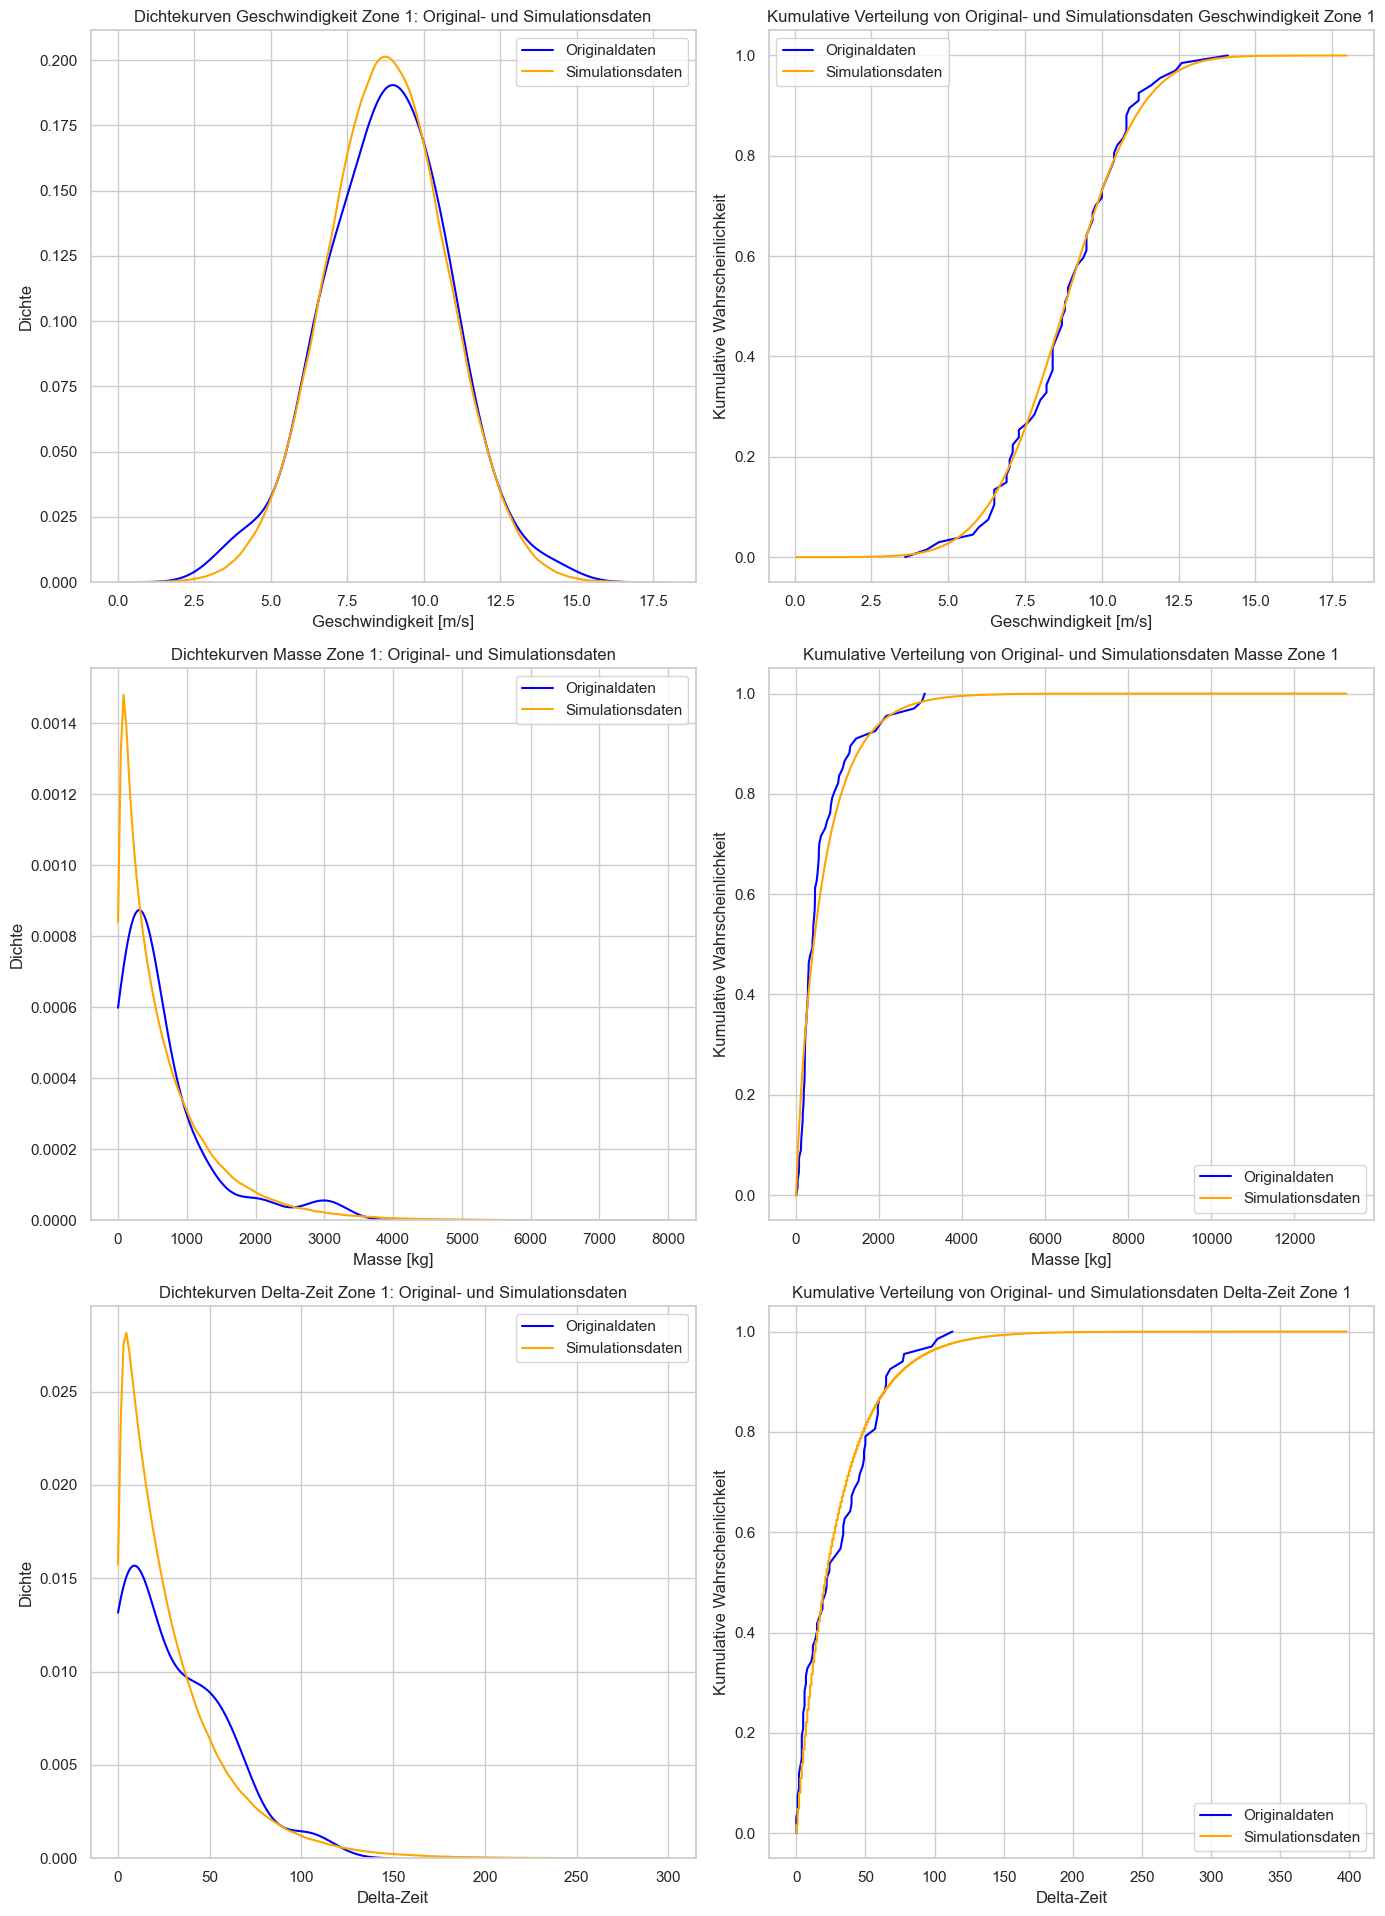

In [71]:
# Setzen Sie den Hintergrund auf weiß mit Gitterlinien
sns.set(style="whitegrid")

# Erstellen Sie eine Figur mit zwei Spalten und drei Zeilen für Subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 21))  # 3 Zeilen, 2 Spalten

##### Dichtekurve Geschwindigkeit Zone 1
# Density plot for original data
sns.kdeplot(zone_1_cleaned['Speed_m/s'], label='Originaldaten', color='blue', ax=axs[0, 0], clip = (0, 18))


# Density plot for simulated data
sns.kdeplot(simulated_zone_1['Speed_m/s'], label='Simulationsdaten', color='orange', ax=axs[0, 0], clip = (0, 18))

# Set plot properties
axs[0, 0].set_title('Dichtekurven Geschwindigkeit Zone 1: Original- und Simulationsdaten')
axs[0, 0].set_xlabel('Geschwindigkeit [m/s]')
axs[0, 0].set_ylabel('Dichte')
axs[0, 0].legend()


##### CDF Geschwindigkeit Zone 1
# Sortieren der Daten
sorted_original_data = np.sort(zone_1_cleaned['Speed_m/s'])
sorted_simulated_data = np.sort(simulated_zone_1['Speed_m/s'])

# Kumulative Verteilungsfunktion
cumulative_distribution_original = np.linspace(0, 1, len(sorted_original_data))
cumulative_distribution_simulated = np.linspace(0, 1, len(sorted_simulated_data))

# Plot kumulative Verteilungen
axs[0, 1].plot(sorted_original_data, cumulative_distribution_original, label='Originaldaten', color='blue')
axs[0, 1].plot(sorted_simulated_data, cumulative_distribution_simulated, label='Simulationsdaten', color='orange')
axs[0, 1].set_title('Kumulative Verteilung von Original- und Simulationsdaten Geschwindigkeit Zone 1')
axs[0, 1].set_xlabel('Geschwindigkeit [m/s]')
axs[0, 1].set_ylabel('Kumulative Wahrscheinlichkeit')
axs[0, 1].legend()

##### Dichtekurve Masse Zone 1
# Density plot for original data
sns.kdeplot(zone_1_cleaned['Mass_kg'], label='Originaldaten', color='blue', ax=axs[1, 0], clip = (0, 8000))

# Density plot for simulated data
sns.kdeplot(simulated_zone_1['Mass_kg'], label='Simulationsdaten', color='orange', ax=axs[1, 0], clip = (0, 8000))
# Set plot properties
axs[1, 0].set_title('Dichtekurven Masse Zone 1: Original- und Simulationsdaten')
axs[1, 0].set_ylabel('Dichte')
axs[1, 0].set_xlabel('Masse [kg]')
axs[1, 0].legend()

##### CDF Masse Zone 1
# Sortieren der Daten
sorted_original_data = np.sort(zone_1_cleaned['Mass_kg'])
sorted_simulated_data = np.sort(simulated_zone_1['Mass_kg'])

# Kumulative Verteilungsfunktion
cumulative_distribution_original = np.linspace(0, 1, len(sorted_original_data))
cumulative_distribution_simulated = np.linspace(0, 1, len(sorted_simulated_data))

# Plot kumulative Verteilungen
axs[1, 1].plot(sorted_original_data, cumulative_distribution_original, label='Originaldaten', color='blue')
axs[1, 1].plot(sorted_simulated_data, cumulative_distribution_simulated, label='Simulationsdaten', color='orange')

axs[1, 1].set_title('Kumulative Verteilung von Original- und Simulationsdaten Masse Zone 1')
axs[1, 1].set_xlabel('Masse [kg]')
axs[1, 1].set_ylabel('Kumulative Wahrscheinlichkeit')
axs[1, 1].legend()

##### Dichtekurve Time Delta Zone 1
# Density plot for original data
sns.kdeplot(zone_1_cleaned['Time_Delta_hours'], label='Originaldaten', color='blue', ax=axs[2, 0], clip = (0, 300))

# Density plot for simulated data
sns.kdeplot(simulated_zone_1['Time_Delta_hours'], label='Simulationsdaten', color='orange', ax=axs[2, 0], clip = (0, 300))
# Set plot properties
axs[2, 0].set_title('Dichtekurven Delta-Zeit Zone 1: Original- und Simulationsdaten')
axs[2, 0].set_ylabel('Dichte')
axs[2, 0].set_xlabel('Delta-Zeit')
axs[2, 0].legend()

##### CDF Delta-Zeit Zone 1
# Sortieren der Daten
sorted_original_data = np.sort(zone_1_cleaned['Time_Delta_hours'])
sorted_simulated_data = np.sort(simulated_zone_1['Time_Delta_hours'])

# Kumulative Verteilungsfunktion
cumulative_distribution_original = np.linspace(0, 1, len(sorted_original_data))
cumulative_distribution_simulated = np.linspace(0, 1, len(sorted_simulated_data))

# Plot kumulative Verteilungen
axs[2, 1].plot(sorted_original_data, cumulative_distribution_original, label='Originaldaten', color='blue')
axs[2, 1].plot(sorted_simulated_data, cumulative_distribution_simulated, label='Simulationsdaten', color='orange')
axs[2, 1].set_title('Kumulative Verteilung von Original- und Simulationsdaten Delta-Zeit Zone 1')
axs[2, 1].set_xlabel('Delta-Zeit')
axs[2, 1].set_ylabel('Kumulative Wahrscheinlichkeit')
axs[2, 1].legend()

# Layout anpassen, um Überlappungen zu verhindern
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Zeigen Sie die kombinierten Plots an
plt.show()

### Compare distributions Zone 2

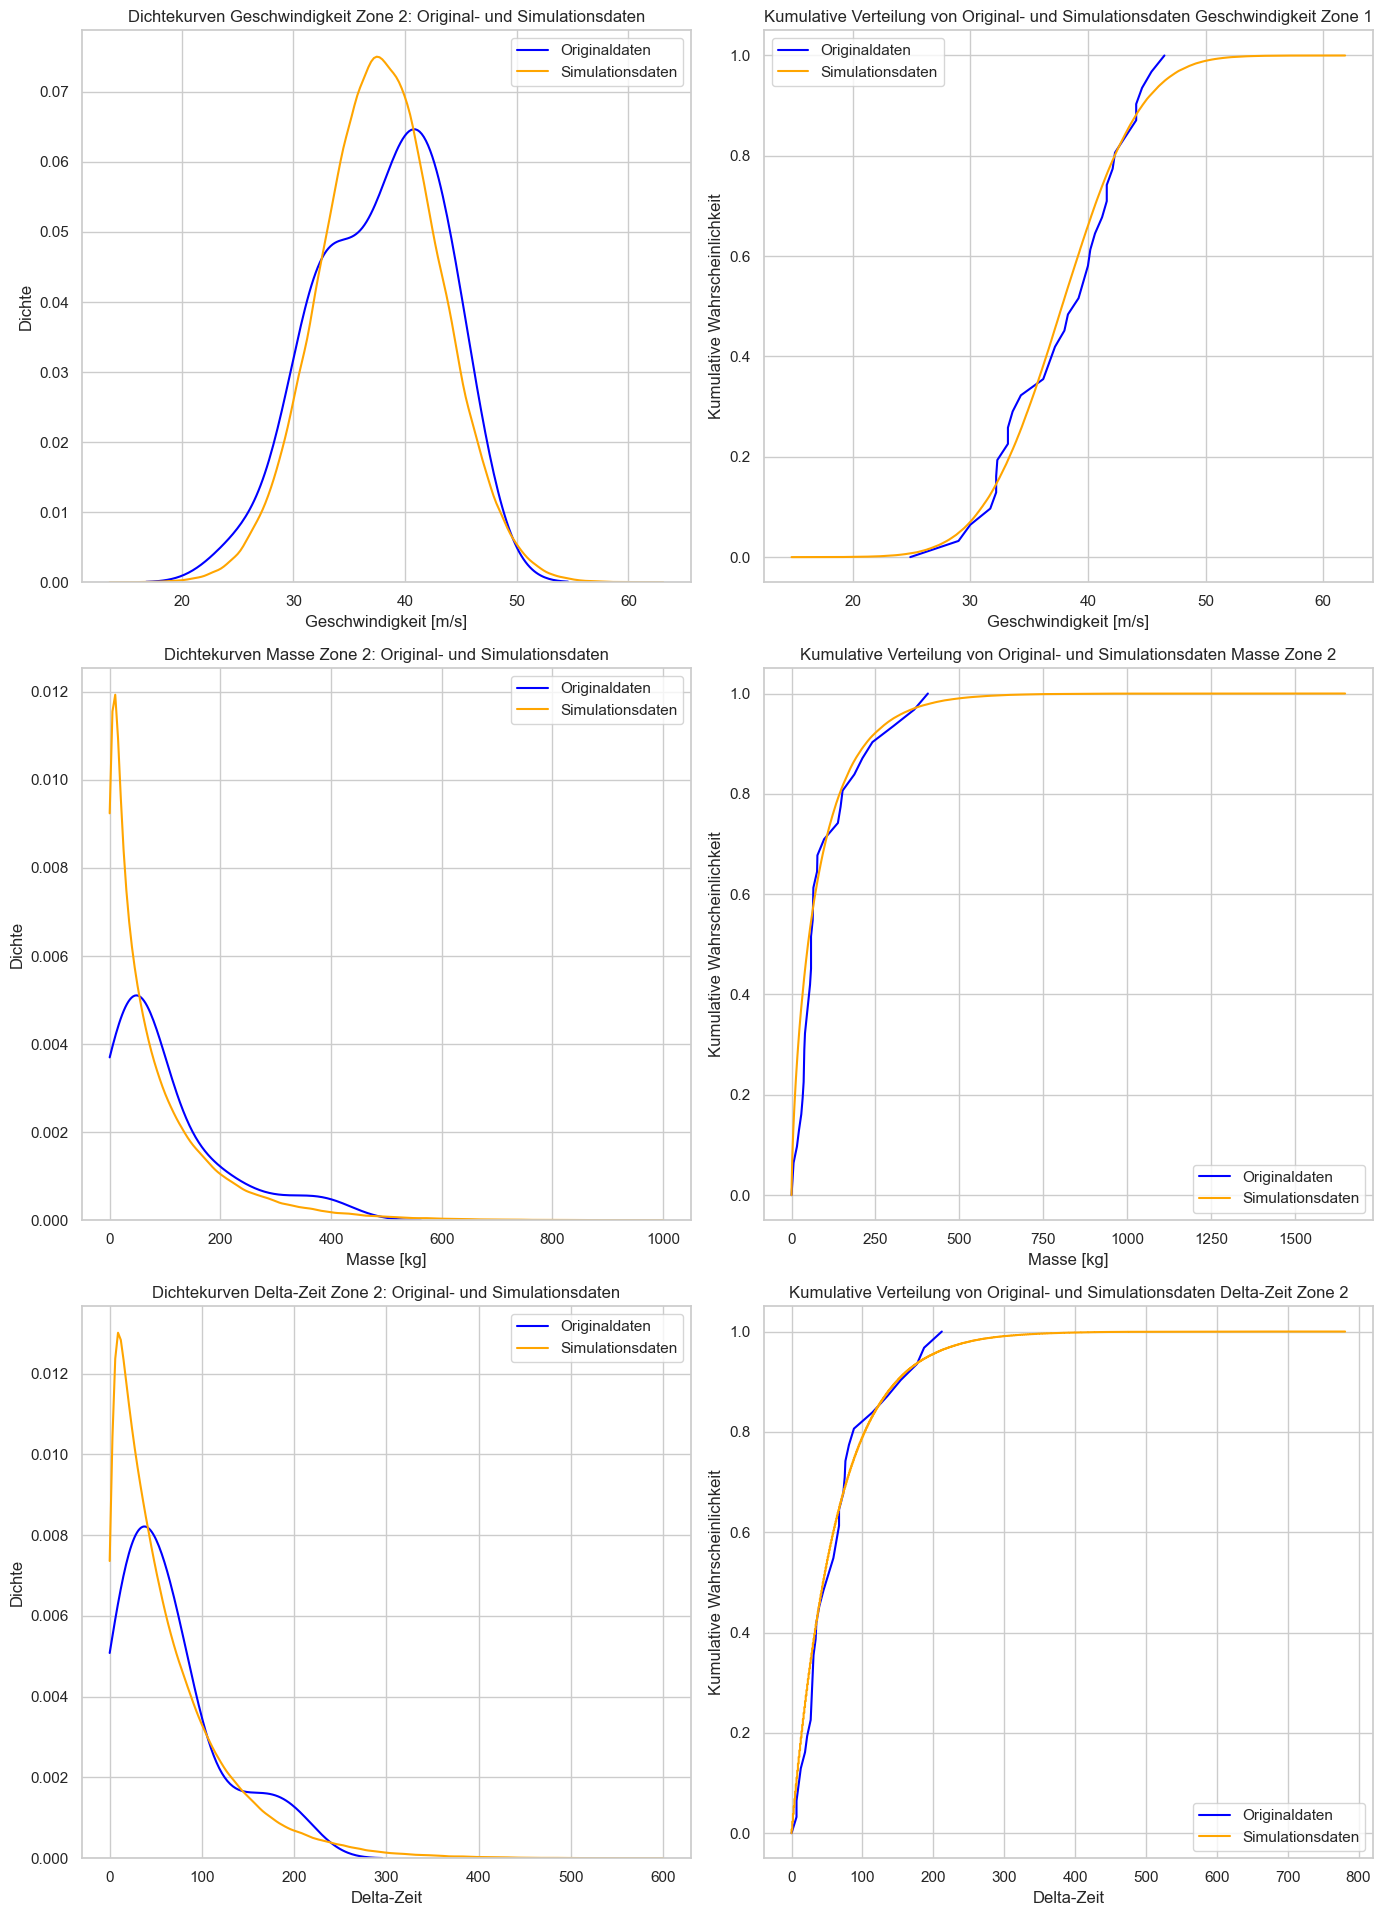

In [72]:
# Setzen Sie den Hintergrund auf weiß mit Gitterlinien
sns.set(style="whitegrid")

# Erstellen Sie eine Figur mit zwei Spalten und drei Zeilen für Subplots
fig, axs = plt.subplots(3, 2, figsize=(14, 21))  # 3 Zeilen, 2 Spalten

##### Dichtekurve Geschwindigkeit Zone 2
# Density plot for original data
sns.kdeplot(zone_2_cleaned['Speed_m/s'], label='Originaldaten', color='blue', ax=axs[0, 0], clip = (0, 70))

# Density plot for simulated data
sns.kdeplot(simulated_zone_2['Speed_m/s'], label='Simulationsdaten', color='orange', ax=axs[0, 0], clip = (0, 70))

# Set plot properties
axs[0, 0].set_title('Dichtekurven Geschwindigkeit Zone 2: Original- und Simulationsdaten')
axs[0, 0].set_xlabel('Geschwindigkeit [m/s]')
axs[0, 0].set_ylabel('Dichte')
axs[0, 0].legend()


##### CDF Geschwindigkeit Zone 2
# Sortieren der Daten
sorted_original_data = np.sort(zone_2_cleaned['Speed_m/s'])
sorted_simulated_data = np.sort(simulated_zone_2['Speed_m/s'])

# Kumulative Verteilungsfunktion
cumulative_distribution_original = np.linspace(0, 1, len(sorted_original_data))
cumulative_distribution_simulated = np.linspace(0, 1, len(sorted_simulated_data))

# Plot kumulative Verteilungen
axs[0, 1].plot(sorted_original_data, cumulative_distribution_original, label='Originaldaten', color='blue')
axs[0, 1].plot(sorted_simulated_data, cumulative_distribution_simulated, label='Simulationsdaten', color='orange')
axs[0, 1].set_title('Kumulative Verteilung von Original- und Simulationsdaten Geschwindigkeit Zone 1')
axs[0, 1].set_xlabel('Geschwindigkeit [m/s]')
axs[0, 1].set_ylabel('Kumulative Wahrscheinlichkeit')
axs[0, 1].legend()

##### Dichtekurve Masse Zone 2
# Density plot for original data
sns.kdeplot(zone_2_cleaned['Mass_kg'], label='Originaldaten', color='blue', ax=axs[1, 0], clip = (0, 1000))

# Density plot for simulated data
sns.kdeplot(simulated_zone_2['Mass_kg'], label='Simulationsdaten', color='orange', ax=axs[1, 0], clip = (0, 1000))
# Set plot properties
axs[1, 0].set_title('Dichtekurven Masse Zone 2: Original- und Simulationsdaten')
axs[1, 0].set_ylabel('Dichte')
axs[1, 0].set_xlabel('Masse [kg]')
axs[1, 0].legend()

##### CDF Masse Zone 2
# Sortieren der Daten
sorted_original_data = np.sort(zone_2_cleaned['Mass_kg'])
sorted_simulated_data = np.sort(simulated_zone_2['Mass_kg'])

# Kumulative Verteilungsfunktion
cumulative_distribution_original = np.linspace(0, 1, len(sorted_original_data))
cumulative_distribution_simulated = np.linspace(0, 1, len(sorted_simulated_data))

# Plot kumulative Verteilungen
axs[1, 1].plot(sorted_original_data, cumulative_distribution_original, label='Originaldaten', color='blue')
axs[1, 1].plot(sorted_simulated_data, cumulative_distribution_simulated, label='Simulationsdaten', color='orange')

axs[1, 1].set_title('Kumulative Verteilung von Original- und Simulationsdaten Masse Zone 2')
axs[1, 1].set_xlabel('Masse [kg]')
axs[1, 1].set_ylabel('Kumulative Wahrscheinlichkeit')
axs[1, 1].legend()

##### Dichtekurve Time Delta Zone 2
# Density plot for original data
sns.kdeplot(zone_2_cleaned['Time_Delta_hours'], label='Originaldaten', color='blue', ax=axs[2, 0], clip = (0, 600))

# Density plot for simulated data
sns.kdeplot(simulated_zone_2['Time_Delta_hours'], label='Simulationsdaten', color='orange', ax=axs[2, 0], clip = (0, 600))
# Set plot properties
axs[2, 0].set_title('Dichtekurven Delta-Zeit Zone 2: Original- und Simulationsdaten')
axs[2, 0].set_ylabel('Dichte')
axs[2, 0].set_xlabel('Delta-Zeit')
axs[2, 0].legend()

##### CDF Delta-Zeit Zone 2
# Sortieren der Daten
sorted_original_data = np.sort(zone_2_cleaned['Time_Delta_hours'])
sorted_simulated_data = np.sort(simulated_zone_2['Time_Delta_hours'])

# Kumulative Verteilungsfunktion
cumulative_distribution_original = np.linspace(0, 1, len(sorted_original_data))
cumulative_distribution_simulated = np.linspace(0, 1, len(sorted_simulated_data))

# Plot kumulative Verteilungen
axs[2, 1].plot(sorted_original_data, cumulative_distribution_original, label='Originaldaten', color='blue')
axs[2, 1].plot(sorted_simulated_data, cumulative_distribution_simulated, label='Simulationsdaten', color='orange')
axs[2, 1].set_title('Kumulative Verteilung von Original- und Simulationsdaten Delta-Zeit Zone 2')
axs[2, 1].set_xlabel('Delta-Zeit')
axs[2, 1].set_ylabel('Kumulative Wahrscheinlichkeit')
axs[2, 1].legend()

# Layout anpassen, um Überlappungen zu verhindern
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Zeigen Sie die kombinierten Plots an
plt.show()

### Jährliche Wahrscheinlichkeit der Todesfälle pro simuliert nach Jahre

In [73]:
# Daten einlesen
data_conv = pd.read_csv('../data/convergence_simulation.csv')
data_conv


,Simulierte Steinschläge,Anzahl Tote,Laufzeit (jahre),Wahrscheinlichkeit Todesfall
0,10000,1,23.419749,0.042699
1,20000,1,46.836187,0.021351
2,30000,1,69.859018,0.014315
3,40000,1,93.313242,0.010717
4,50000,1,116.834703,0.008559
...,...,...,...,...
94,950000,3,2227.757991,0.001347
95,960000,3,2250.654680,0.001333
96,970000,3,2274.142694,0.001319
97,980000,3,2297.788470,0.001306


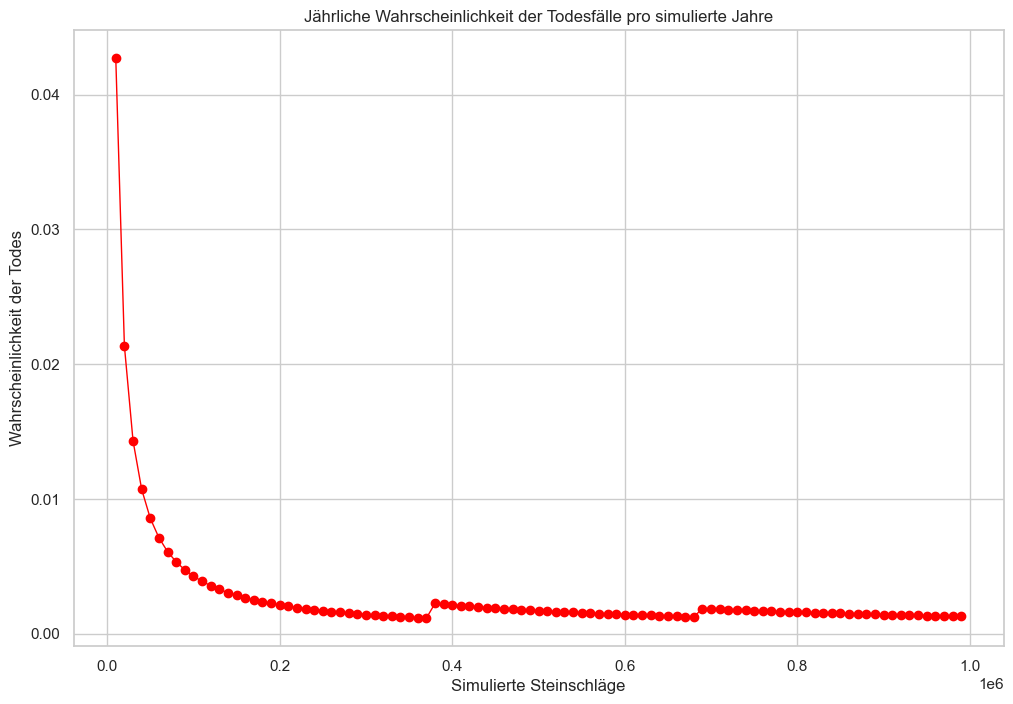

In [74]:
#Plot erstellen mit der Konvergenz der simulierten Daten
plt.figure(figsize=(12, 8))  # 
plt.scatter(data_conv['Simulierte Steinschläge'], data_conv['Wahrscheinlichkeit Todesfall'], color='red') 
plt.plot(data_conv['Simulierte Steinschläge'], data_conv['Wahrscheinlichkeit Todesfall'], color='red', linewidth=1)  

# Achsen beschriften
plt.xlabel('Simulierte Steinschläge')
plt.ylabel('Wahrscheinlichkeit der Todes')
plt.title('Jährliche Wahrscheinlichkeit der Todesfälle pro simulierte Jahre')

plt.show()